#Part 1

##1.1

##Quadratic Programming

In [ ]:
import numpy as np
import cvxopt

def solve_qp(K, y):

    n = len(y)

    K = K.astype(np.double)
    P = cvxopt.matrix(K)
    q = cvxopt.matrix(-np.ones((n, 1)))
    G = cvxopt.matrix(-np.eye(n))
    h = cvxopt.matrix(np.zeros(n))
    A = cvxopt.matrix(y.reshape(1, -1).astype(np.double))
    b = cvxopt.matrix(np.zeros(1))

    cvxopt.solvers.options['show_progress'] = False
    solution = cvxopt.solvers.qp(P, q, G, h, A, b)

    alpha = np.array(solution['x']).flatten()
    return alpha


X = np.array([[1, -1, 1], [-3, 1, 1], [-3, 1, -1], [1, 2, 1], [-1, -1, 2]])
y = np.array([-1, 1, -1, -1, 1])

K = np.dot(X, X.T)

alpha_values = solve_qp(K, y)
print("Alpha Values:", alpha_values)


Alpha Values: [0.14813745 0.09998717 0.03333975 0.09630057 0.1777906 ]


#Part 2

In [ ]:
#https://drive.google.com/file/d/1CAZXeWj3pUHU3sOPbAzpD6F91O1CQE4o/view?usp=sharing
!gdown 1CAZXeWj3pUHU3sOPbAzpD6F91O1CQE4o

Downloading...
From: https://drive.google.com/uc?id=1CAZXeWj3pUHU3sOPbAzpD6F91O1CQE4o
To: /content/PRSA_data_2010.1.1-2014.12.31.csv
100% 2.01M/2.01M [00:00<00:00, 125MB/s]


#1.2.2

In [ ]:
import pandas as pd
df=pd.read_csv('/content/PRSA_data_2010.1.1-2014.12.31.csv')
df

No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd     Iws  \
0          1  2010      1    1     0    NaN   -21 -11.0  1021.0   NW    1.79   
1          2  2010      1    1     1    NaN   -21 -12.0  1020.0   NW    4.92   
2          3  2010      1    1     2    NaN   -21 -11.0  1019.0   NW    6.71   
3          4  2010      1    1     3    NaN   -21 -14.0  1019.0   NW    9.84   
4          5  2010      1    1     4    NaN   -20 -12.0  1018.0   NW   12.97   
...      ...   ...    ...  ...   ...    ...   ...   ...     ...  ...     ...   
43819  43820  2014     12   31    19    8.0   -23  -2.0  1034.0   NW  231.97   
43820  43821  2014     12   31    20   10.0   -22  -3.0  1034.0   NW  237.78   
43821  43822  2014     12   31    21   10.0   -22  -3.0  1034.0   NW  242.70   
43822  43823  2014     12   31    22    8.0   -22  -4.0  1034.0   NW  246.72   
43823  43824  2014     12   31    23   12.0   -21  -3.0  1034.0   NW  249.85   

       Is  Ir  
0       0   0  
1       0   0  
2       0   0  
3       0   0  
4       0   0  
...    ..  ..  
43819   0   0  
43820   0   0  
43821   0   0  
43822   0   0  
43823   0   0  

[43824 rows x 13 columns]

#1.2.3

## Checking missing values


In [ ]:

df.isnull().sum()

No          0
year        0
month       0
day         0
hour        0
pm2.5    2067
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
dtype: int64

##Filling missing values=>imputation

In [ ]:
# Filling missing values in the 'pm2.5' column with its mean
df['pm2.5'] = df['pm2.5'].fillna(df['pm2.5'].mean())

print(df.isnull().sum())

No       0
year     0
month    0
day      0
hour     0
pm2.5    0
DEWP     0
TEMP     0
PRES     0
cbwd     0
Iws      0
Is       0
Ir       0
dtype: int64


#1.2.4

##Checking for categorical features

In [ ]:
for col in df.columns:
  if df[col].dtype == 'object':
    print(col, df[col].unique())

cbwd ['NW' 'cv' 'NE' 'SE']


##Encoding

In [ ]:

df['cbwd_encoded'] = df['cbwd'].astype('category').cat.codes

print(df[['cbwd', 'cbwd_encoded']].head())
df

  cbwd  cbwd_encoded
0   NW             1
1   NW             1
2   NW             1
3   NW             1
4   NW             1


No  year  month  day  hour      pm2.5  DEWP  TEMP    PRES cbwd  \
0          1  2010      1    1     0  98.613215   -21 -11.0  1021.0   NW   
1          2  2010      1    1     1  98.613215   -21 -12.0  1020.0   NW   
2          3  2010      1    1     2  98.613215   -21 -11.0  1019.0   NW   
3          4  2010      1    1     3  98.613215   -21 -14.0  1019.0   NW   
4          5  2010      1    1     4  98.613215   -20 -12.0  1018.0   NW   
...      ...   ...    ...  ...   ...        ...   ...   ...     ...  ...   
43819  43820  2014     12   31    19   8.000000   -23  -2.0  1034.0   NW   
43820  43821  2014     12   31    20  10.000000   -22  -3.0  1034.0   NW   
43821  43822  2014     12   31    21  10.000000   -22  -3.0  1034.0   NW   
43822  43823  2014     12   31    22   8.000000   -22  -4.0  1034.0   NW   
43823  43824  2014     12   31    23  12.000000   -21  -3.0  1034.0   NW   

          Iws  Is  Ir  cbwd_encoded  
0        1.79   0   0             1  
1        4.92   0   0             1  
2        6.71   0   0             1  
3        9.84   0   0             1  
4       12.97   0   0             1  
...       ...  ..  ..           ...  
43819  231.97   0   0             1  
43820  237.78   0   0             1  
43821  242.70   0   0             1  
43822  246.72   0   0             1  
43823  249.85   0   0             1  

[43824 rows x 14 columns]

#1.2.5

##Checking for outliers

In [ ]:

columns_to_check = ['Iws', 'DEWP', 'TEMP', 'pm2.5']

for col in columns_to_check:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    print(f"Column: {col}")
    print(f"  Q1: {Q1}")
    print(f"  Q3: {Q3}")
    print(f"  IQR: {IQR}")
    print(f"  Lower Bound: {lower_bound}")
    print(f"  Upper Bound: {upper_bound}")
    print(f"  Number of outliers: {len(outliers)}")
    print("-" * 20)

Column: Iws
  Q1: 1.79
  Q3: 21.91
  IQR: 20.12
  Lower Bound: -28.39
  Upper Bound: 52.09
  Number of outliers: 5101
--------------------
Column: DEWP
  Q1: -10.0
  Q3: 15.0
  IQR: 25.0
  Lower Bound: -47.5
  Upper Bound: 52.5
  Number of outliers: 0
--------------------
Column: TEMP
  Q1: 2.0
  Q3: 23.0
  IQR: 21.0
  Lower Bound: -29.5
  Upper Bound: 54.5
  Number of outliers: 0
--------------------
Column: pm2.5
  Q1: 31.0
  Q3: 132.0
  IQR: 101.0
  Lower Bound: -120.5
  Upper Bound: 283.5
  Number of outliers: 2117
--------------------


##Dealing with outliers

In [ ]:

for col in columns_to_check:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    median_val = df[col].median()
    df.loc[(df[col] < lower_bound) | (df[col] > upper_bound), col] = median_val

    print(f"Column: {col} (Outliers imputed with median)")
    print(f"  Q1: {Q1}")
    print(f"  Q3: {Q3}")
    print(f"  IQR: {IQR}")
    print(f"  Lower Bound: {lower_bound}")
    print(f"  Upper Bound: {upper_bound}")

    outliers_after = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"  Number of outliers after imputation: {len(outliers_after)}")
    print("-" * 20)

df.head()

Column: Iws (Outliers imputed with median)
  Q1: 1.79
  Q3: 21.91
  IQR: 20.12
  Lower Bound: -28.39
  Upper Bound: 52.09
  Number of outliers after imputation: 0
--------------------
Column: DEWP (Outliers imputed with median)
  Q1: -10.0
  Q3: 15.0
  IQR: 25.0
  Lower Bound: -47.5
  Upper Bound: 52.5
  Number of outliers after imputation: 0
--------------------
Column: TEMP (Outliers imputed with median)
  Q1: 2.0
  Q3: 23.0
  IQR: 21.0
  Lower Bound: -29.5
  Upper Bound: 54.5
  Number of outliers after imputation: 0
--------------------
Column: pm2.5 (Outliers imputed with median)
  Q1: 31.0
  Q3: 132.0
  IQR: 101.0
  Lower Bound: -120.5
  Upper Bound: 283.5
  Number of outliers after imputation: 0
--------------------


No  year  month  day  hour      pm2.5  DEWP  TEMP    PRES cbwd    Iws  Is  \
0   1  2010      1    1     0  98.613215   -21 -11.0  1021.0   NW   1.79   0   
1   2  2010      1    1     1  98.613215   -21 -12.0  1020.0   NW   4.92   0   
2   3  2010      1    1     2  98.613215   -21 -11.0  1019.0   NW   6.71   0   
3   4  2010      1    1     3  98.613215   -21 -14.0  1019.0   NW   9.84   0   
4   5  2010      1    1     4  98.613215   -20 -12.0  1018.0   NW  12.97   0   

   Ir  cbwd_encoded  
0   0             1  
1   0             1  
2   0             1  
3   0             1  
4   0             1

#1.2.6

##Classifying PM2.5

In [ ]:
import pandas as pd

def classify_pm25(pm25_value):

    if 0.0 <= pm25_value <= 12.0:
        return "Good"
    elif 12.1 <= pm25_value <= 35.4:
        return "Moderate"
    elif 35.5 <= pm25_value <= 55.4:
        return "Unhealthy for Sensitive Groups"
    elif 55.5 <= pm25_value <= 150.4:
        return "Unhealthy"
    elif 150.5 <= pm25_value <= 250.4:
        return "Very Unhealthy"
    elif 250.5 <= pm25_value <= 350.4:
        return "Hazardous"
    elif 350.5 <= pm25_value <= 500.0:
        return "Hazardous"
    else:
        return "Out of Range"

df['AQI Category'] = df['pm2.5'].apply(classify_pm25)

print(df[['pm2.5', 'AQI Category']].head())
df

       pm2.5 AQI Category
0  98.613215    Unhealthy
1  98.613215    Unhealthy
2  98.613215    Unhealthy
3  98.613215    Unhealthy
4  98.613215    Unhealthy


No  year  month  day  hour      pm2.5  DEWP  TEMP    PRES cbwd  \
0          1  2010      1    1     0  98.613215   -21 -11.0  1021.0   NW   
1          2  2010      1    1     1  98.613215   -21 -12.0  1020.0   NW   
2          3  2010      1    1     2  98.613215   -21 -11.0  1019.0   NW   
3          4  2010      1    1     3  98.613215   -21 -14.0  1019.0   NW   
4          5  2010      1    1     4  98.613215   -20 -12.0  1018.0   NW   
...      ...   ...    ...  ...   ...        ...   ...   ...     ...  ...   
43819  43820  2014     12   31    19   8.000000   -23  -2.0  1034.0   NW   
43820  43821  2014     12   31    20  10.000000   -22  -3.0  1034.0   NW   
43821  43822  2014     12   31    21  10.000000   -22  -3.0  1034.0   NW   
43822  43823  2014     12   31    22   8.000000   -22  -4.0  1034.0   NW   
43823  43824  2014     12   31    23  12.000000   -21  -3.0  1034.0   NW   

         Iws  Is  Ir  cbwd_encoded AQI Category  
0       1.79   0   0             1    Unhealthy  
1       4.92   0   0             1    Unhealthy  
2       6.71   0   0             1    Unhealthy  
3       9.84   0   0             1    Unhealthy  
4      12.97   0   0             1    Unhealthy  
...      ...  ..  ..           ...          ...  
43819   5.37   0   0             1         Good  
43820   5.37   0   0             1         Good  
43821   5.37   0   0             1         Good  
43822   5.37   0   0             1         Good  
43823   5.37   0   0             1         Good  

[43824 rows x 15 columns]

In [ ]:
print(df['AQI Category'].unique())

['Unhealthy' 'Very Unhealthy' 'Unhealthy for Sensitive Groups' 'Moderate'
 'Hazardous' 'Good']


#1.2.7 Exploratory Data Analysis

#Lag features

In [ ]:

def add_lagged_columns(df, lag_hours):

  for lag in lag_hours:
    df[f'pm2.5_lag_{lag}h'] = df['pm2.5'].shift(lag)
  return df

df = add_lagged_columns(df, [2, 24])

print(df[['pm2.5', 'pm2.5_lag_2h', 'pm2.5_lag_24h']].head())
df


       pm2.5  pm2.5_lag_2h  pm2.5_lag_24h
0  98.613215           NaN            NaN
1  98.613215           NaN            NaN
2  98.613215     98.613215            NaN
3  98.613215     98.613215            NaN
4  98.613215     98.613215            NaN


No  year  month  day  hour      pm2.5  DEWP  TEMP    PRES cbwd  \
0          1  2010      1    1     0  98.613215   -21 -11.0  1021.0   NW   
1          2  2010      1    1     1  98.613215   -21 -12.0  1020.0   NW   
2          3  2010      1    1     2  98.613215   -21 -11.0  1019.0   NW   
3          4  2010      1    1     3  98.613215   -21 -14.0  1019.0   NW   
4          5  2010      1    1     4  98.613215   -20 -12.0  1018.0   NW   
...      ...   ...    ...  ...   ...        ...   ...   ...     ...  ...   
43819  43820  2014     12   31    19   8.000000   -23  -2.0  1034.0   NW   
43820  43821  2014     12   31    20  10.000000   -22  -3.0  1034.0   NW   
43821  43822  2014     12   31    21  10.000000   -22  -3.0  1034.0   NW   
43822  43823  2014     12   31    22   8.000000   -22  -4.0  1034.0   NW   
43823  43824  2014     12   31    23  12.000000   -21  -3.0  1034.0   NW   

         Iws  Is  Ir  cbwd_encoded AQI Category  pm2.5_lag_2h  pm2.5_lag_24h  
0       1.79   0   0             1    Unhealthy           NaN            NaN  
1       4.92   0   0             1    Unhealthy           NaN            NaN  
2       6.71   0   0             1    Unhealthy     98.613215            NaN  
3       9.84   0   0             1    Unhealthy     98.613215            NaN  
4      12.97   0   0             1    Unhealthy     98.613215            NaN  
...      ...  ..  ..           ...          ...           ...            ...  
43819   5.37   0   0             1         Good      9.000000           35.0  
43820   5.37   0   0             1         Good     10.000000           26.0  
43821   5.37   0   0             1         Good      8.000000           20.0  
43822   5.37   0   0             1         Good     10.000000            8.0  
43823   5.37   0   0             1         Good     10.000000           16.0  

[43824 rows x 17 columns]

##Dealin with NaN values in lagged features

In [ ]:

for lag in [2, 24]:
    df[f'pm2.5_lag_{lag}h'] = df[f'pm2.5_lag_{lag}h'].fillna(df[f'pm2.5_lag_{lag}h'].mean())

print(df[[f'pm2.5_lag_{lag}h' for lag in [2, 24]]].isnull().sum())


pm2.5_lag_2h     0
pm2.5_lag_24h    0
dtype: int64


In [ ]:
df.isnull().sum()

No               0
year             0
month            0
day              0
hour             0
pm2.5            0
DEWP             0
TEMP             0
PRES             0
cbwd             0
Iws              0
Is               0
Ir               0
cbwd_encoded     0
AQI Category     0
pm2.5_lag_2h     0
pm2.5_lag_24h    0
dtype: int64

##Plotting lag_2 & lag_24

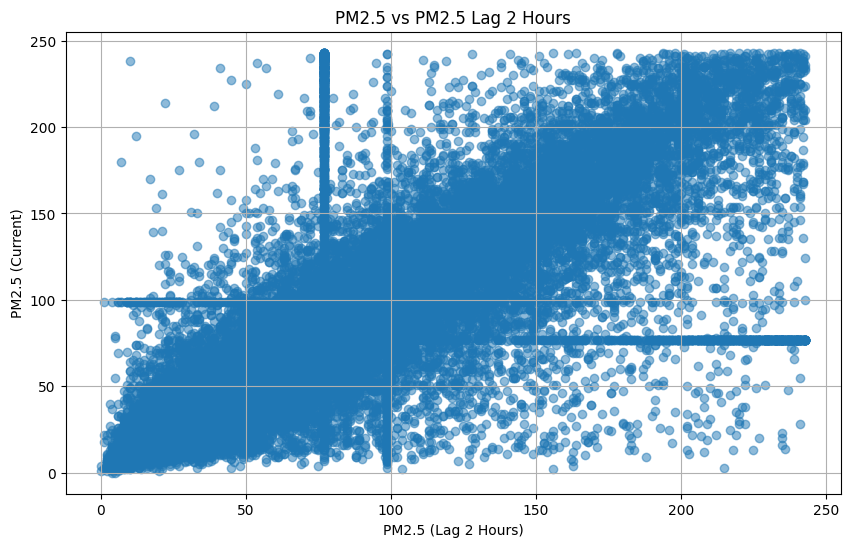

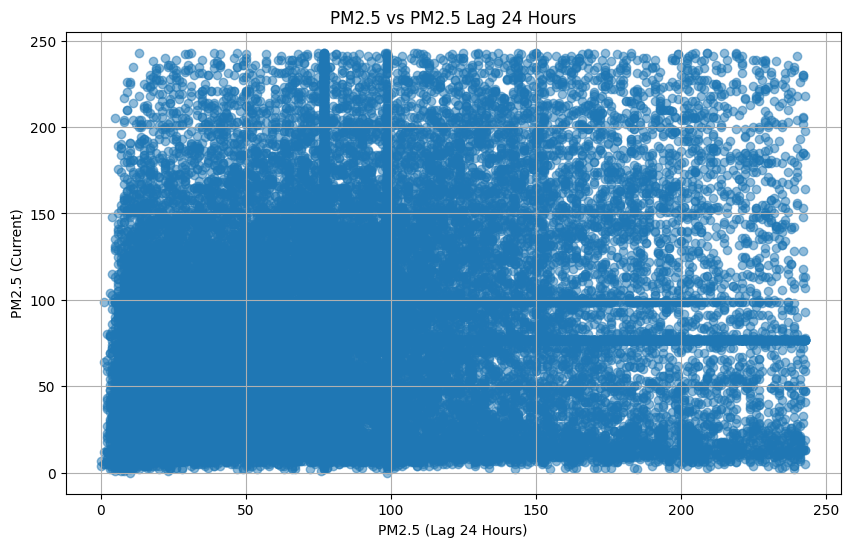

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['pm2.5_lag_2h'], df['pm2.5'], alpha=0.5)
plt.title('PM2.5 vs PM2.5 Lag 2 Hours')
plt.xlabel('PM2.5 (Lag 2 Hours)')
plt.ylabel('PM2.5 (Current)')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df['pm2.5_lag_24h'], df['pm2.5'], alpha=0.5)
plt.title('PM2.5 vs PM2.5 Lag 24 Hours')
plt.xlabel('PM2.5 (Lag 24 Hours)')
plt.ylabel('PM2.5 (Current)')
plt.grid(True)
plt.show()


##Correlation between PM2.5 and lagged features

Correlation Matrix:
                  pm2.5  pm2.5_lag_2h  pm2.5_lag_24h
pm2.5          1.000000      0.815758       0.239165
pm2.5_lag_2h   0.815758      1.000000       0.266729
pm2.5_lag_24h  0.239165      0.266729       1.000000


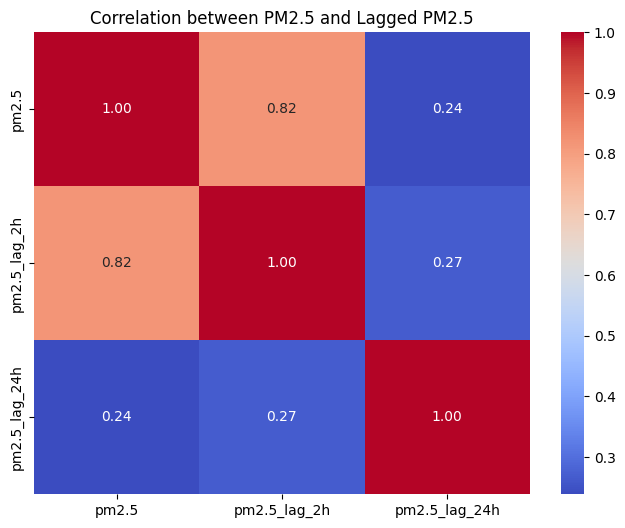

In [ ]:
import seaborn as sns

correlation_matrix = df[['pm2.5', 'pm2.5_lag_2h', 'pm2.5_lag_24h']].corr()

print("Correlation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between PM2.5 and Lagged PM2.5')
plt.show()

#Rolling Statistics

In [ ]:
window_size = 24
df = df.copy()
df['pm2.5_rolling_statistics'] = df['pm2.5'].rolling(window=window_size).mean()

print(df[['pm2.5_rolling_statistics']].tail())
df


       pm2.5_rolling_statistics
43819                 11.291667
43820                 10.625000
43821                 10.208333
43822                 10.208333
43823                 10.041667


No  year  month  day  hour      pm2.5  DEWP  TEMP    PRES cbwd  \
0          1  2010      1    1     0  98.613215   -21 -11.0  1021.0   NW   
1          2  2010      1    1     1  98.613215   -21 -12.0  1020.0   NW   
2          3  2010      1    1     2  98.613215   -21 -11.0  1019.0   NW   
3          4  2010      1    1     3  98.613215   -21 -14.0  1019.0   NW   
4          5  2010      1    1     4  98.613215   -20 -12.0  1018.0   NW   
...      ...   ...    ...  ...   ...        ...   ...   ...     ...  ...   
43819  43820  2014     12   31    19   8.000000   -23  -2.0  1034.0   NW   
43820  43821  2014     12   31    20  10.000000   -22  -3.0  1034.0   NW   
43821  43822  2014     12   31    21  10.000000   -22  -3.0  1034.0   NW   
43822  43823  2014     12   31    22   8.000000   -22  -4.0  1034.0   NW   
43823  43824  2014     12   31    23  12.000000   -21  -3.0  1034.0   NW   

         Iws  Is  Ir  cbwd_encoded AQI Category  pm2.5_lag_2h  pm2.5_lag_24h  \
0       1.79   0   0             1    Unhealthy     84.552771      84.590194   
1       4.92   0   0             1    Unhealthy     84.552771      84.590194   
2       6.71   0   0             1    Unhealthy     98.613215      84.590194   
3       9.84   0   0             1    Unhealthy     98.613215      84.590194   
4      12.97   0   0             1    Unhealthy     98.613215      84.590194   
...      ...  ..  ..           ...          ...           ...            ...   
43819   5.37   0   0             1         Good      9.000000      35.000000   
43820   5.37   0   0             1         Good     10.000000      26.000000   
43821   5.37   0   0             1         Good      8.000000      20.000000   
43822   5.37   0   0             1         Good     10.000000       8.000000   
43823   5.37   0   0             1         Good     10.000000      16.000000   

       AQI_Category_Encoded  pm2.5_rolling_statistics  
0                         3                       NaN  
1                         3                       NaN  
2                         3                       NaN  
3                         3                       NaN  
4                         3                       NaN  
...                     ...                       ...  
43819                     0                 11.291667  
43820                     0                 10.625000  
43821                     0                 10.208333  
43822                     0                 10.208333  
43823                     0                 10.041667  

[43824 rows x 19 columns]

##Dealing with NaN values in rolling statistics

In [ ]:

df['pm2.5_rolling_statistics'] = df['pm2.5_rolling_statistics'].fillna(df['pm2.5_rolling_statistics'].mean())

print(df['pm2.5_rolling_statistics'].isnull().sum())

0


In [ ]:
df.head()

No  year  month  day  hour      pm2.5  DEWP  TEMP    PRES cbwd    Iws  Is  \
0   1  2010      1    1     0  98.613215   -21 -11.0  1021.0   NW   1.79   0   
1   2  2010      1    1     1  98.613215   -21 -12.0  1020.0   NW   4.92   0   
2   3  2010      1    1     2  98.613215   -21 -11.0  1019.0   NW   6.71   0   
3   4  2010      1    1     3  98.613215   -21 -14.0  1019.0   NW   9.84   0   
4   5  2010      1    1     4  98.613215   -20 -12.0  1018.0   NW  12.97   0   

   Ir  cbwd_encoded AQI Category  pm2.5_lag_2h  pm2.5_lag_24h  \
0   0             1    Unhealthy     84.552771      84.590194   
1   0             1    Unhealthy     84.552771      84.590194   
2   0             1    Unhealthy     98.613215      84.590194   
3   0             1    Unhealthy     98.613215      84.590194   
4   0             1    Unhealthy     98.613215      84.590194   

   AQI_Category_Encoded  pm2.5_rolling_statistics  
0                     3                 84.565296  
1                     3                 84.565296  
2                     3                 84.565296  
3                     3                 84.565296  
4                     3                 84.565296

##Plotting pm2.5 vs Rolling statistics

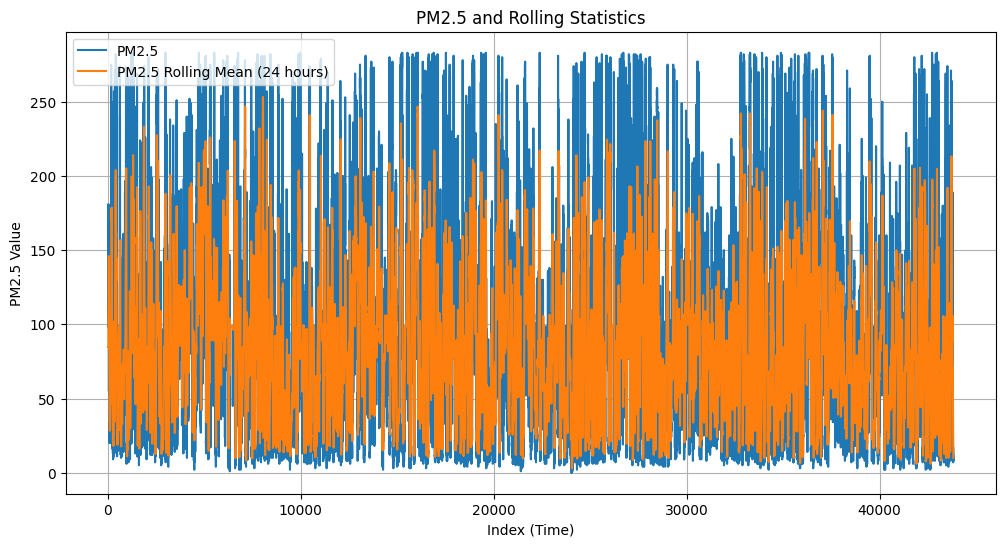

In [ ]:

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['pm2.5'], label='PM2.5')
plt.plot(df.index, df['pm2.5_rolling_statistics'], label=f'PM2.5 Rolling Mean ({window_size} hours)')
plt.title('PM2.5 and Rolling Statistics')
plt.xlabel('Index (Time)')
plt.ylabel('PM2.5 Value')
plt.legend()
plt.grid(True)
plt.show()

#Cyclic Encoding

In [ ]:
def encode_cyclic(df, col, max_val):
    df[col + '_sin'] = np.sin(2 * np.pi * df[col]/max_val)
    df[col + '_cos'] = np.cos(2 * np.pi * df[col]/max_val)
    return df

import numpy as np
df = encode_cyclic(df, 'year', df['year'].max())
df = encode_cyclic(df, 'month', 12)
df = encode_cyclic(df, 'day', 31)
df = encode_cyclic(df, 'hour', 23)

print(df[['year', 'year_sin', 'year_cos',
          'month', 'month_sin', 'month_cos',
          'day', 'day_sin', 'day_cos',
          'hour', 'hour_sin', 'hour_cos']].head())

df.head()

   year  year_sin  year_cos  month  month_sin  month_cos  day   day_sin  \
0  2010 -0.012479  0.999922      1        0.5   0.866025    1  0.201299   
1  2010 -0.012479  0.999922      1        0.5   0.866025    1  0.201299   
2  2010 -0.012479  0.999922      1        0.5   0.866025    1  0.201299   
3  2010 -0.012479  0.999922      1        0.5   0.866025    1  0.201299   
4  2010 -0.012479  0.999922      1        0.5   0.866025    1  0.201299   

   day_cos  hour  hour_sin  hour_cos  
0  0.97953     0  0.000000  1.000000  
1  0.97953     1  0.269797  0.962917  
2  0.97953     2  0.519584  0.854419  
3  0.97953     3  0.730836  0.682553  
4  0.97953     4  0.887885  0.460065  


No  year  month  day  hour      pm2.5  DEWP  TEMP    PRES cbwd  ...  \
0   1  2010      1    1     0  98.613215   -21 -11.0  1021.0   NW  ...   
1   2  2010      1    1     1  98.613215   -21 -12.0  1020.0   NW  ...   
2   3  2010      1    1     2  98.613215   -21 -11.0  1019.0   NW  ...   
3   4  2010      1    1     3  98.613215   -21 -14.0  1019.0   NW  ...   
4   5  2010      1    1     4  98.613215   -20 -12.0  1018.0   NW  ...   

   AQI_Category_Encoded  pm2.5_rolling_statistics  year_sin  year_cos  \
0                     3                 84.565296 -0.012479  0.999922   
1                     3                 84.565296 -0.012479  0.999922   
2                     3                 84.565296 -0.012479  0.999922   
3                     3                 84.565296 -0.012479  0.999922   
4                     3                 84.565296 -0.012479  0.999922   

  month_sin  month_cos   day_sin  day_cos  hour_sin  hour_cos  
0       0.5   0.866025  0.201299  0.97953  0.000000  1.000000  
1       0.5   0.866025  0.201299  0.97953  0.269797  0.962917  
2       0.5   0.866025  0.201299  0.97953  0.519584  0.854419  
3       0.5   0.866025  0.201299  0.97953  0.730836  0.682553  
4       0.5   0.866025  0.201299  0.97953  0.887885  0.460065  

[5 rows x 27 columns]

##Encoded scatter plot of ‘hour’

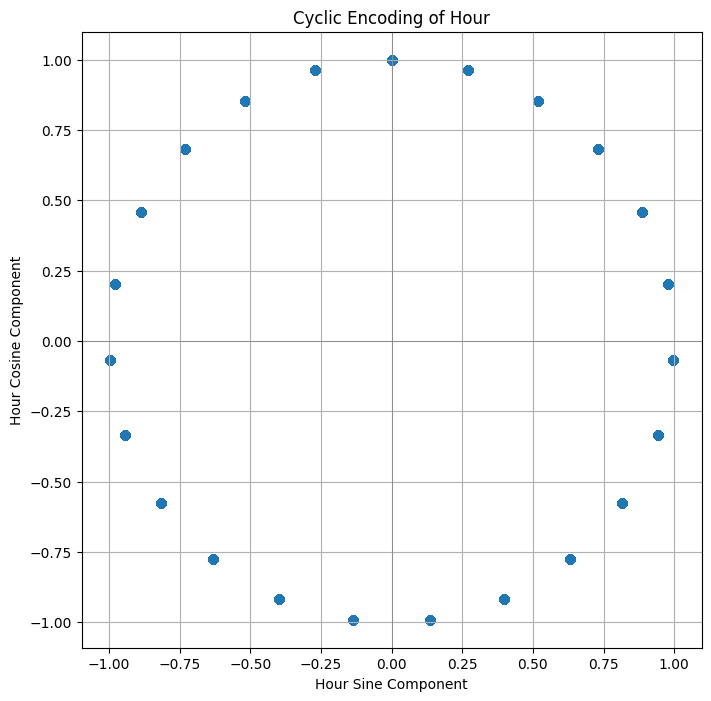

In [ ]:

plt.figure(figsize=(8, 8))
plt.scatter(df['hour_sin'], df['hour_cos'])
plt.title('Cyclic Encoding of Hour')
plt.xlabel('Hour Sine Component')
plt.ylabel('Hour Cosine Component')
plt.grid(True)
plt.axhline(0, color='grey', lw=0.5)
plt.axvline(0, color='grey', lw=0.5)
plt.show()

##Advanced time series features

##Seasonal index column

In [ ]:
def get_season(month):
  if month in [12, 1, 2]:
    return 'Winter'
  elif month in [3, 4, 5]:
    return 'Spring'
  elif month in [6, 7, 8]:
    return 'Summer'
  else:
    return 'Autumn'

df['season'] = df['month'].apply(get_season)
print(df[['month', 'season']].head())
print(df[['month', 'season']].tail())
df

   month  season
0      1  Winter
1      1  Winter
2      1  Winter
3      1  Winter
4      1  Winter
       month  season
43819     12  Winter
43820     12  Winter
43821     12  Winter
43822     12  Winter
43823     12  Winter


No  year  month  day  hour      pm2.5  DEWP  TEMP    PRES cbwd  ...  \
0          1  2010      1    1     0  98.613215   -21 -11.0  1021.0   NW  ...   
1          2  2010      1    1     1  98.613215   -21 -12.0  1020.0   NW  ...   
2          3  2010      1    1     2  98.613215   -21 -11.0  1019.0   NW  ...   
3          4  2010      1    1     3  98.613215   -21 -14.0  1019.0   NW  ...   
4          5  2010      1    1     4  98.613215   -20 -12.0  1018.0   NW  ...   
...      ...   ...    ...  ...   ...        ...   ...   ...     ...  ...  ...   
43819  43820  2014     12   31    19   8.000000   -23  -2.0  1034.0   NW  ...   
43820  43821  2014     12   31    20  10.000000   -22  -3.0  1034.0   NW  ...   
43821  43822  2014     12   31    21  10.000000   -22  -3.0  1034.0   NW  ...   
43822  43823  2014     12   31    22   8.000000   -22  -4.0  1034.0   NW  ...   
43823  43824  2014     12   31    23  12.000000   -21  -3.0  1034.0   NW  ...   

       pm2.5_rolling_statistics      year_sin  year_cos     month_sin  \
0                     84.565296 -1.247869e-02  0.999922  5.000000e-01   
1                     84.565296 -1.247869e-02  0.999922  5.000000e-01   
2                     84.565296 -1.247869e-02  0.999922  5.000000e-01   
3                     84.565296 -1.247869e-02  0.999922  5.000000e-01   
4                     84.565296 -1.247869e-02  0.999922  5.000000e-01   
...                         ...           ...       ...           ...   
43819                 11.291667 -2.449294e-16  1.000000 -2.449294e-16   
43820                 10.625000 -2.449294e-16  1.000000 -2.449294e-16   
43821                 10.208333 -2.449294e-16  1.000000 -2.449294e-16   
43822                 10.208333 -2.449294e-16  1.000000 -2.449294e-16   
43823                 10.041667 -2.449294e-16  1.000000 -2.449294e-16   

      month_cos       day_sin  day_cos      hour_sin  hour_cos  season  
0      0.866025  2.012985e-01  0.97953  0.000000e+00  1.000000  Winter  
1      0.866025  2.012985e-01  0.97953  2.697968e-01  0.962917  Winter  
2      0.866025  2.012985e-01  0.97953  5.195840e-01  0.854419  Winter  
3      0.866025  2.012985e-01  0.97953  7.308360e-01  0.682553  Winter  
4      0.866025  2.012985e-01  0.97953  8.878852e-01  0.460065  Winter  
...         ...           ...      ...           ...       ...     ...  
43819  1.000000 -2.449294e-16  1.00000 -8.878852e-01  0.460065  Winter  
43820  1.000000 -2.449294e-16  1.00000 -7.308360e-01  0.682553  Winter  
43821  1.000000 -2.449294e-16  1.00000 -5.195840e-01  0.854419  Winter  
43822  1.000000 -2.449294e-16  1.00000 -2.697968e-01  0.962917  Winter  
43823  1.000000 -2.449294e-16  1.00000 -2.449294e-16  1.000000  Winter  

[43824 rows x 28 columns]

##Season with the most pollution

Proportion of AQI Categories by Season:
AQI Category      Good  Hazardous  Moderate  Unhealthy  \
season                                                   
Autumn        0.112821   0.031044  0.182418   0.426465   
Spring        0.068478   0.016757  0.202627   0.458424   
Summer        0.040851   0.009058  0.162138   0.512047   
Winter        0.087583   0.028825  0.250739   0.411678   

AQI Category  Unhealthy for Sensitive Groups  Very Unhealthy  
season                                                        
Autumn                              0.106685        0.140568  
Spring                              0.128895        0.124819  
Summer                              0.132065        0.143841  
Winter                              0.088415        0.132761  

Pollution Score (Sum of Proportions of Unhealthy, Very Unhealthy, Hazardous) by Season:
season
Autumn    0.598077
Spring    0.600000
Summer    0.664946
Winter    0.573263
dtype: float64

Season with the most pollution (highest propo

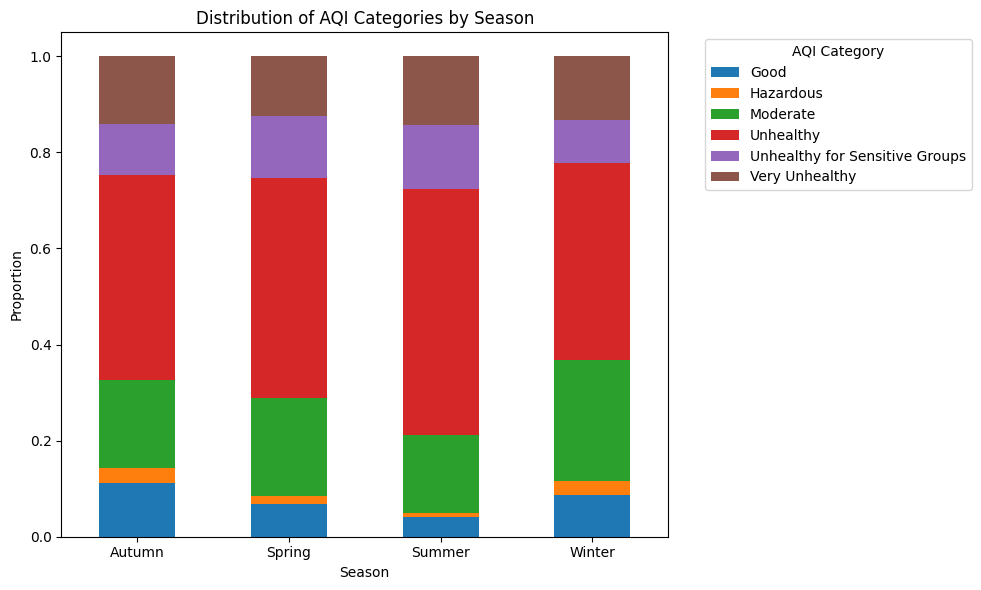

In [ ]:

season_aqi_counts = df.groupby('season')['AQI Category'].value_counts(normalize=True).unstack(fill_value=0)

print("Proportion of AQI Categories by Season:")
print(season_aqi_counts)
polluted_categories = ['Unhealthy', 'Very Unhealthy', 'Hazardous']
season_pollution_score = season_aqi_counts[polluted_categories].sum(axis=1)

print("\nPollution Score (Sum of Proportions of Unhealthy, Very Unhealthy, Hazardous) by Season:")
print(season_pollution_score)

most_polluted_season = season_pollution_score.idxmax()

print(f"\nSeason with the most pollution (highest proportion of Unhealthy+): {most_polluted_season}")

season_aqi_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of AQI Categories by Season')
plt.xlabel('Season')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='AQI Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

##Polluted days of the week

Proportion of AQI Categories by Day of the Week:
AQI Category          Good  Hazardous  Moderate  Unhealthy  \
day_of_week_name                                             
Monday            0.085409   0.025702  0.201948   0.458333   
Tuesday           0.077905   0.017880  0.202586   0.449553   
Wednesday         0.088761   0.026022  0.221264   0.423691   
Thursday          0.083814   0.017308  0.208974   0.427885   
Friday            0.057152   0.021392  0.190294   0.473499   
Saturday          0.063857   0.022989  0.178640   0.469668   
Sunday            0.084132   0.018199  0.191252   0.464240   

AQI Category      Unhealthy for Sensitive Groups  Very Unhealthy  
day_of_week_name                                                  
Monday                                  0.110951        0.117656  
Tuesday                                 0.106801        0.145275  
Wednesday                               0.114783        0.125479  
Thursday                                0.117628        0

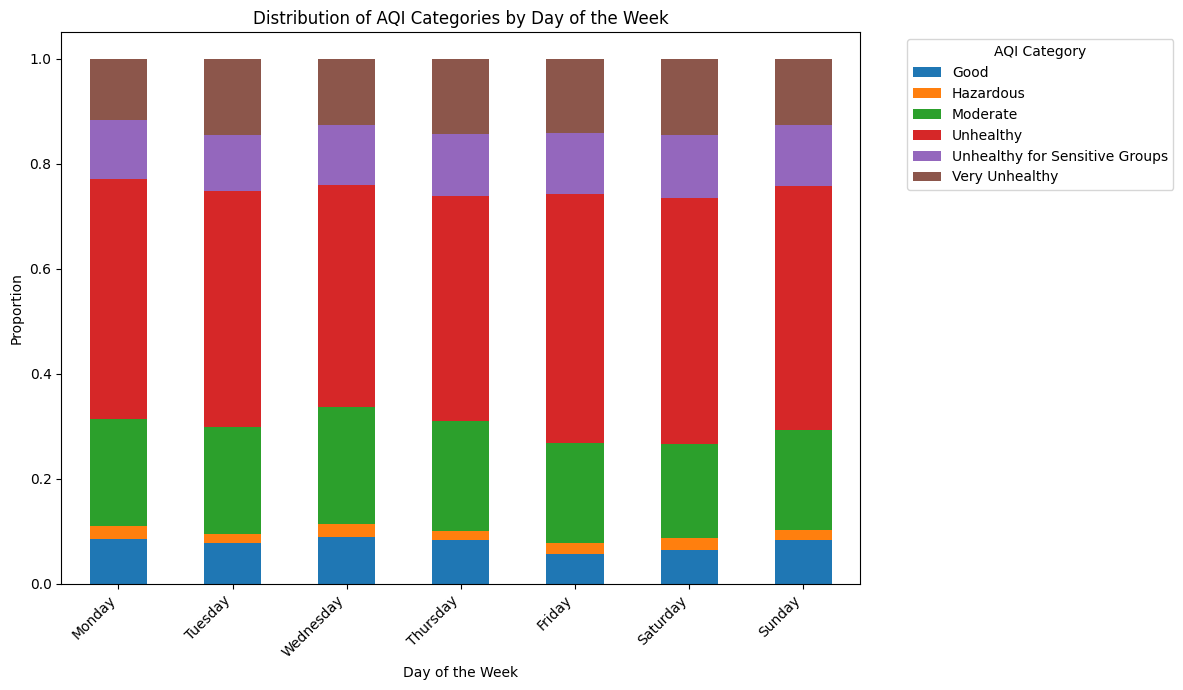

In [ ]:

df['day_of_week'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']]).dt.dayofweek

day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df['day_of_week_name'] = df['day_of_week'].map(day_names)

day_aqi_counts = df.groupby('day_of_week_name')['AQI Category'].value_counts(normalize=True).unstack(fill_value=0)

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_aqi_counts = day_aqi_counts.reindex(day_order)

print("Proportion of AQI Categories by Day of the Week:")
print(day_aqi_counts)

polluted_categories = ['Unhealthy', 'Very Unhealthy', 'Hazardous']

day_pollution_score = day_aqi_counts[polluted_categories].sum(axis=1)

print("\nPollution Score (Sum of Proportions of Unhealthy, Very Unhealthy, Hazardous) by Day of the Week:")
print(day_pollution_score)

most_polluted_day = day_pollution_score.idxmax()

print(f"\nDay of the week with the most pollution (highest proportion of Unhealthy+): {most_polluted_day}")

day_aqi_counts.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Distribution of AQI Categories by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='AQI Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

##Effect of environmental factors on pollution

###Correlation Matrix

Correlation Matrix between PM2.5 and Environmental Factors:
          pm2.5       Iws      TEMP      PRES
pm2.5  1.000000 -0.107427  0.022482 -0.138304
Iws   -0.107427  1.000000  0.099422 -0.057010
TEMP   0.022482  0.099422  1.000000 -0.826690
PRES  -0.138304 -0.057010 -0.826690  1.000000


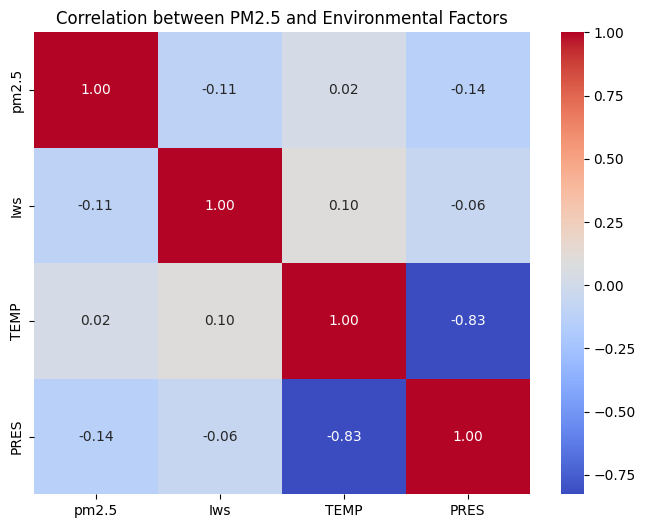

In [ ]:
correlation_matrix_environmental = df[['pm2.5', 'Iws', 'TEMP','PRES']].corr()
print("Correlation Matrix between PM2.5 and Environmental Factors:")
print(correlation_matrix_environmental)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_environmental, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between PM2.5 and Environmental Factors')
plt.show()

###Pair plot

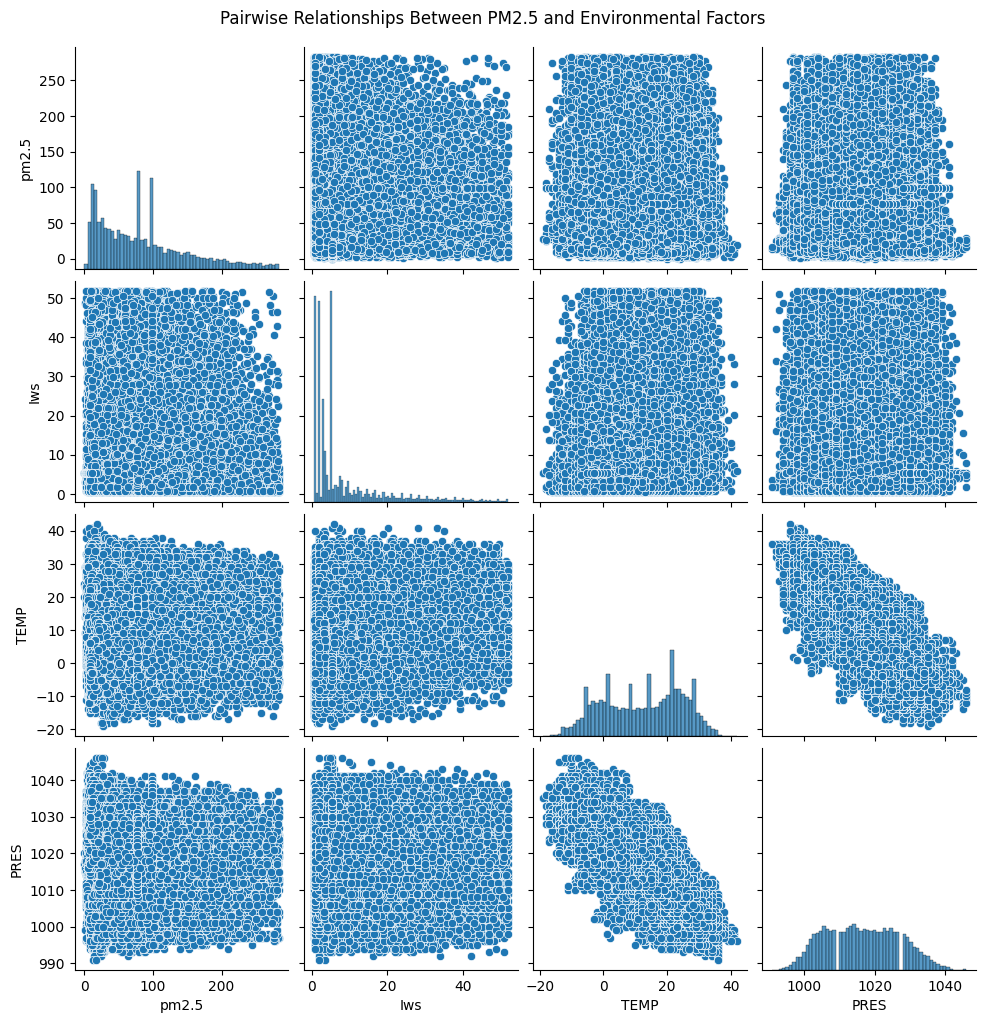

In [ ]:

sns.pairplot(df[['pm2.5', 'Iws', 'TEMP','PRES']])
plt.suptitle('Pairwise Relationships Between PM2.5 and Environmental Factors', y=1.02) # Add a title
plt.show()

### Hourly Pattern

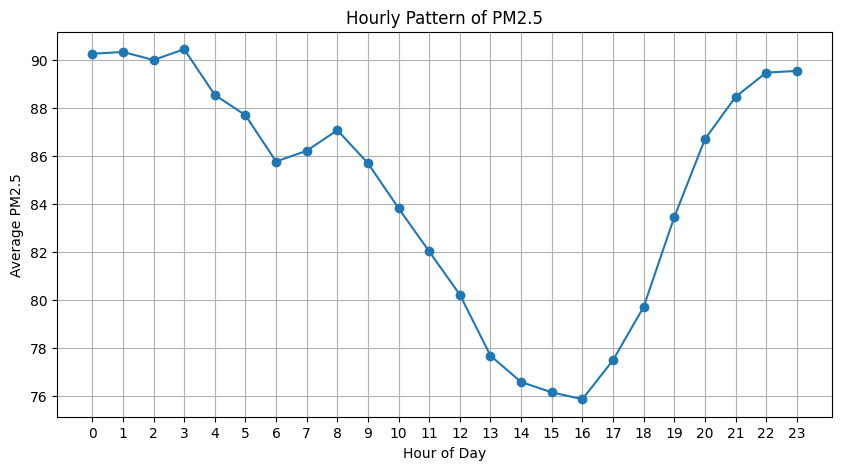

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
hourly_mean = df.groupby('hour')['pm2.5'].mean()

plt.figure(figsize=(10,5))
plt.plot(hourly_mean.index, hourly_mean.values, marker='o')
plt.xlabel('Hour of Day')
plt.ylabel('Average PM2.5')
plt.title('Hourly Pattern of PM2.5')
plt.xticks(range(0,24))
plt.grid(True)
plt.show()


#1.2.8 Data Visualization

##pm2.5 based hour/day/month/year

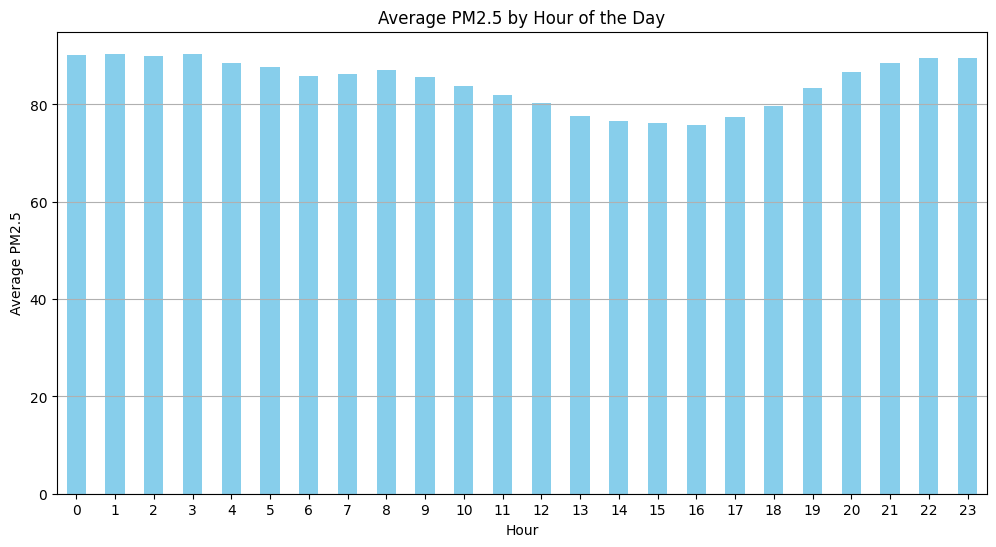

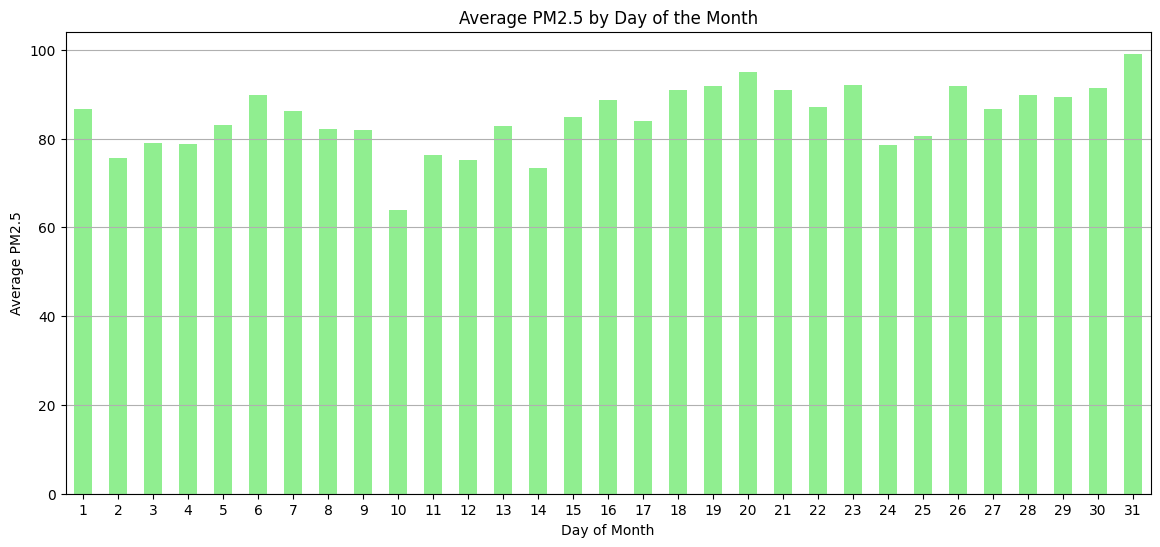

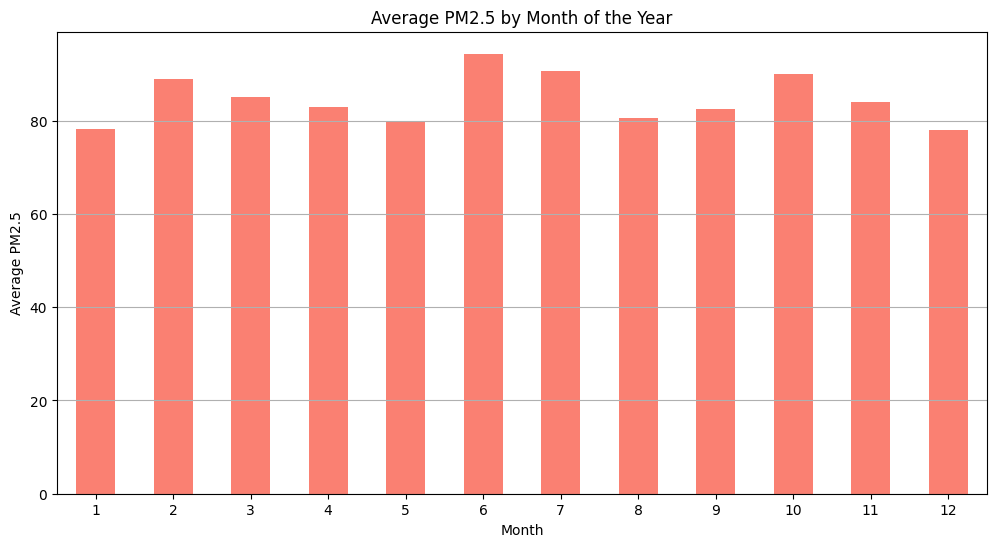

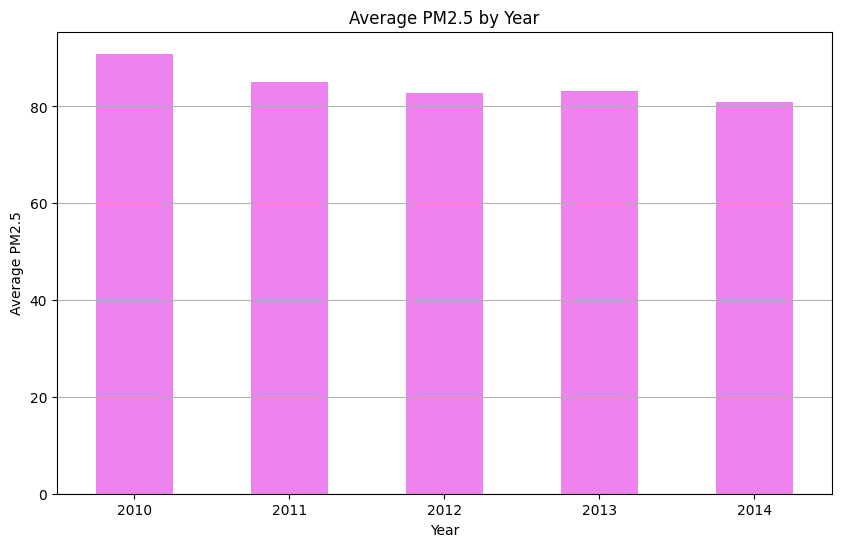

In [ ]:
hourly_pm25 = df.groupby('hour')['pm2.5'].mean()

plt.figure(figsize=(12, 6))
hourly_pm25.plot(kind='bar', color='skyblue')
plt.title('Average PM2.5 by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Average PM2.5')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

daily_pm25 = df.groupby('day')['pm2.5'].mean()

plt.figure(figsize=(14, 6))
daily_pm25.plot(kind='bar', color='lightgreen')
plt.title('Average PM2.5 by Day of the Month')
plt.xlabel('Day of Month')
plt.ylabel('Average PM2.5')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

monthly_pm25 = df.groupby('month')['pm2.5'].mean()

plt.figure(figsize=(12, 6))
monthly_pm25.plot(kind='bar', color='salmon')
plt.title('Average PM2.5 by Month of the Year')
plt.xlabel('Month')
plt.ylabel('Average PM2.5')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

yearly_pm25 = df.groupby('year')['pm2.5'].mean()

plt.figure(figsize=(10, 6))
yearly_pm25.plot(kind='bar', color='violet')
plt.title('Average PM2.5 by Year')
plt.xlabel('Year')
plt.ylabel('Average PM2.5')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

##Adding a new column for showing year,month,day & hour in one

In [ ]:
df['year_month_day_hour'] = df['year'].astype(str) + '-' + \
                            df['month'].astype(str).str.zfill(2) + '-' + \
                            df['day'].astype(str).str.zfill(2) + ' ' + \
                            df['hour'].astype(str).str.zfill(2)

df.head()

No  year  month  day  hour      pm2.5  DEWP  TEMP    PRES cbwd  ...  \
0   1  2010      1    1     0  98.613215   -21 -11.0  1021.0   NW  ...   
1   2  2010      1    1     1  98.613215   -21 -12.0  1020.0   NW  ...   
2   3  2010      1    1     2  98.613215   -21 -11.0  1019.0   NW  ...   
3   4  2010      1    1     3  98.613215   -21 -14.0  1019.0   NW  ...   
4   5  2010      1    1     4  98.613215   -20 -12.0  1018.0   NW  ...   

   month_sin  month_cos   day_sin  day_cos  hour_sin  hour_cos  season  \
0        0.5   0.866025  0.201299  0.97953  0.000000  1.000000  Winter   
1        0.5   0.866025  0.201299  0.97953  0.269797  0.962917  Winter   
2        0.5   0.866025  0.201299  0.97953  0.519584  0.854419  Winter   
3        0.5   0.866025  0.201299  0.97953  0.730836  0.682553  Winter   
4        0.5   0.866025  0.201299  0.97953  0.887885  0.460065  Winter   

   day_of_week  day_of_week_name  year_month_day_hour  
0            4            Friday        2010-01-01 00  
1            4            Friday        2010-01-01 01  
2            4            Friday        2010-01-01 02  
3            4            Friday        2010-01-01 03  
4            4            Friday        2010-01-01 04  

[5 rows x 31 columns]

In [ ]:
df['year_month_day_hour'].head()

0    2010-01-01 00
1    2010-01-01 01
2    2010-01-01 02
3    2010-01-01 03
4    2010-01-01 04
Name: year_month_day_hour, dtype: object

##PM2.5 over time plot

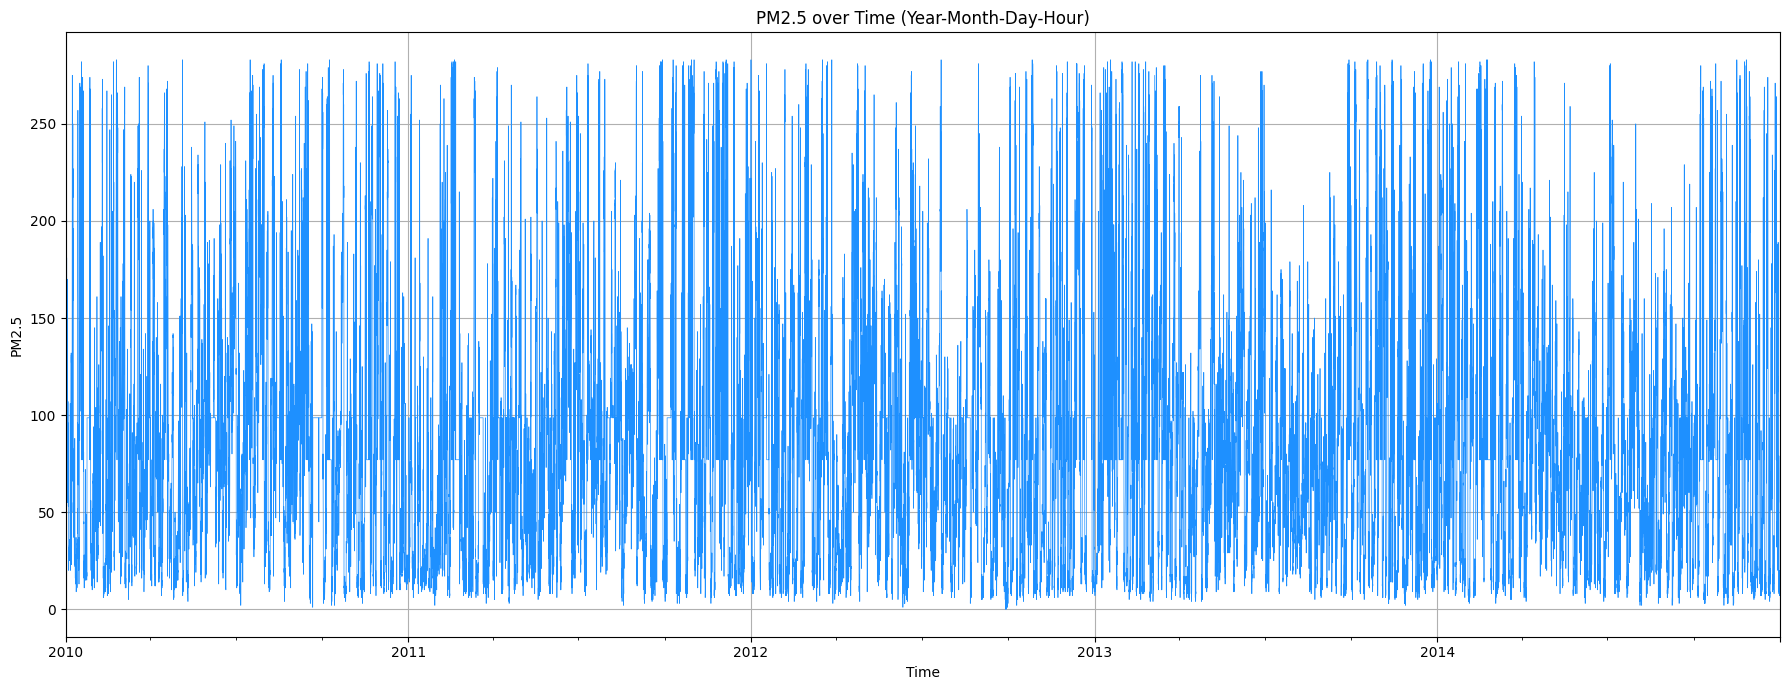

In [ ]:

df['year_month_day_hour'] = pd.to_datetime(df['year_month_day_hour'])
df_sorted = df.sort_values(by='year_month_day_hour')

df_sorted = df_sorted.set_index('year_month_day_hour')

plt.figure(figsize=(18, 7))
df_sorted['pm2.5'].plot(linewidth=0.5, color='dodgerblue')
plt.title('PM2.5 over Time (Year-Month-Day-Hour)')
plt.xlabel('Time')
plt.ylabel('PM2.5')
plt.grid(True)
plt.tight_layout()
plt.show()

##Maximum air pollution date/dates

In [ ]:

max_pm25_datetime = df_sorted['pm2.5'].idxmax()
max_pm25_value = df_sorted['pm2.5'].max()

print(f"The maximum PM2.5 value of {max_pm25_value:.2f} occurred at {max_pm25_datetime}")

top_n = 10
top_pm25_dates = df_sorted['pm2.5'].nlargest(top_n)

print(f"\nTop {top_n} dates and times with the highest PM2.5 values:")
top_pm25_dates

The maximum PM2.5 value of 283.00 occurred at 2010-02-24 00:00:00

Top 10 dates and times with the highest PM2.5 values:


year_month_day_hour
2010-02-24 00:00:00    283.0
2010-05-05 10:00:00    283.0
2010-07-16 12:00:00    283.0
2010-08-18 14:00:00    283.0
2010-10-09 03:00:00    283.0
2010-10-09 04:00:00    283.0
2011-02-19 03:00:00    283.0
2011-09-28 14:00:00    283.0
2011-10-10 00:00:00    283.0
2011-10-29 12:00:00    283.0
Name: pm2.5, dtype: float64

## The least PM2.5:January or December?

In [ ]:
january_pm25 = monthly_pm25[1]
december_pm25 = monthly_pm25[12]
if january_pm25 < december_pm25:
  print(f"January has the least average PM2.5 ({january_pm25:.2f}) compared to December ({december_pm25:.2f}).")
elif december_pm25 < january_pm25:
  print(f"December has the least average PM2.5 ({december_pm25:.2f}) compared to January ({january_pm25:.2f}).")
else:
  print(f"January and December have the same average PM2.5 ({january_pm25:.2f}).")


December has the least average PM2.5 (77.95) compared to January (78.23).


#1.2.9

##Balancing Data

In [ ]:
df

No  year  month  day  hour      pm2.5  DEWP  TEMP    PRES cbwd  ...  \
0          1  2010      1    1     0  98.613215   -21 -11.0  1021.0   NW  ...   
1          2  2010      1    1     1  98.613215   -21 -12.0  1020.0   NW  ...   
2          3  2010      1    1     2  98.613215   -21 -11.0  1019.0   NW  ...   
3          4  2010      1    1     3  98.613215   -21 -14.0  1019.0   NW  ...   
4          5  2010      1    1     4  98.613215   -20 -12.0  1018.0   NW  ...   
...      ...   ...    ...  ...   ...        ...   ...   ...     ...  ...  ...   
43819  43820  2014     12   31    19   8.000000   -23  -2.0  1034.0   NW  ...   
43820  43821  2014     12   31    20  10.000000   -22  -3.0  1034.0   NW  ...   
43821  43822  2014     12   31    21  10.000000   -22  -3.0  1034.0   NW  ...   
43822  43823  2014     12   31    22   8.000000   -22  -4.0  1034.0   NW  ...   
43823  43824  2014     12   31    23  12.000000   -21  -3.0  1034.0   NW  ...   

          month_sin  month_cos       day_sin  day_cos      hour_sin  hour_cos  \
0      5.000000e-01   0.866025  2.012985e-01  0.97953  0.000000e+00  1.000000   
1      5.000000e-01   0.866025  2.012985e-01  0.97953  2.697968e-01  0.962917   
2      5.000000e-01   0.866025  2.012985e-01  0.97953  5.195840e-01  0.854419   
3      5.000000e-01   0.866025  2.012985e-01  0.97953  7.308360e-01  0.682553   
4      5.000000e-01   0.866025  2.012985e-01  0.97953  8.878852e-01  0.460065   
...             ...        ...           ...      ...           ...       ...   
43819 -2.449294e-16   1.000000 -2.449294e-16  1.00000 -8.878852e-01  0.460065   
43820 -2.449294e-16   1.000000 -2.449294e-16  1.00000 -7.308360e-01  0.682553   
43821 -2.449294e-16   1.000000 -2.449294e-16  1.00000 -5.195840e-01  0.854419   
43822 -2.449294e-16   1.000000 -2.449294e-16  1.00000 -2.697968e-01  0.962917   
43823 -2.449294e-16   1.000000 -2.449294e-16  1.00000 -2.449294e-16  1.000000   

       season  day_of_week  day_of_week_name  year_month_day_hour  
0      Winter            4            Friday  2010-01-01 00:00:00  
1      Winter            4            Friday  2010-01-01 01:00:00  
2      Winter            4            Friday  2010-01-01 02:00:00  
3      Winter            4            Friday  2010-01-01 03:00:00  
4      Winter            4            Friday  2010-01-01 04:00:00  
...       ...          ...               ...                  ...  
43819  Winter            2         Wednesday  2014-12-31 19:00:00  
43820  Winter            2         Wednesday  2014-12-31 20:00:00  
43821  Winter            2         Wednesday  2014-12-31 21:00:00  
43822  Winter            2         Wednesday  2014-12-31 22:00:00  
43823  Winter            2         Wednesday  2014-12-31 23:00:00  

[43824 rows x 31 columns]

## correlation  AQI category with top 10 features

#Distriburtion of 'AQI Category' classes

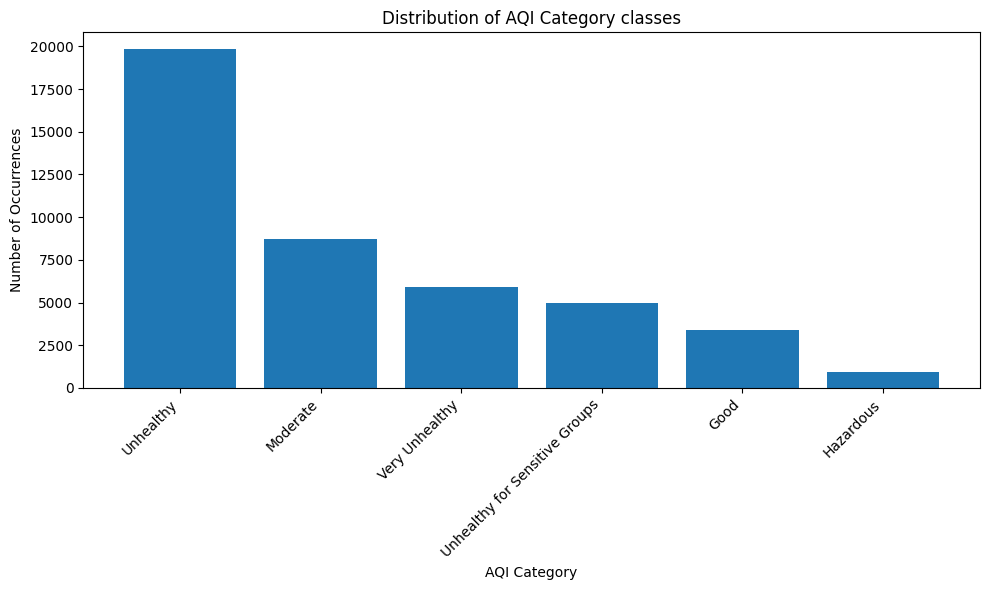

In [ ]:

aqi_counts = df['AQI Category'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(aqi_counts.index, aqi_counts.values)
plt.title('Distribution of AQI Category classes')
plt.xlabel('AQI Category')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##Balancing the dataset=> under sampling

Original dataset shape: (43824, 31)
Undersampled dataset shape: (5616, 31)

Distribution of AQI Category after Undersampling:
AQI Category
Good                              936
Hazardous                         936
Moderate                          936
Unhealthy                         936
Unhealthy for Sensitive Groups    936
Very Unhealthy                    936
Name: count, dtype: int64


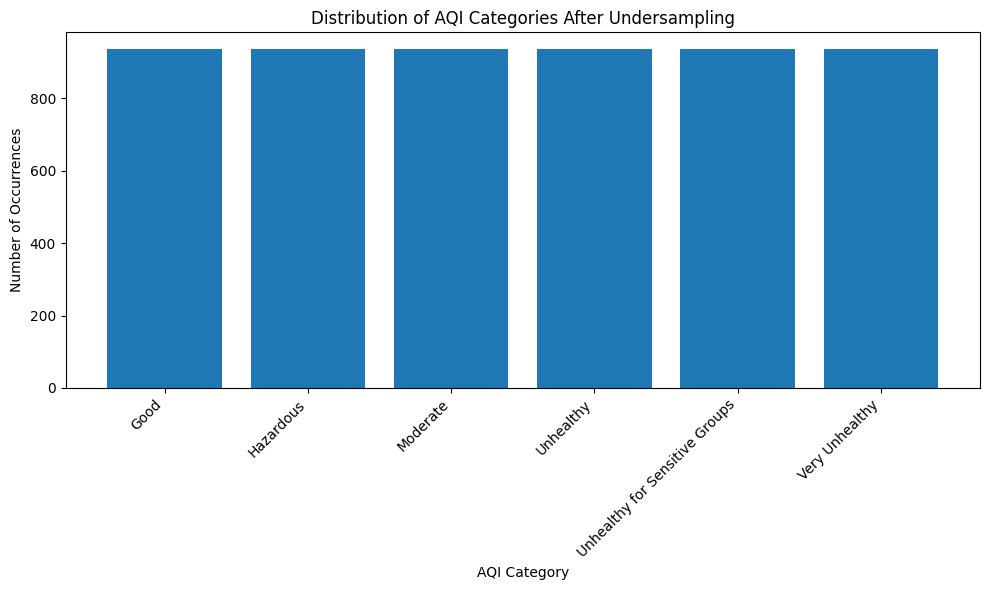

In [ ]:

from imblearn.under_sampling import RandomUnderSampler

target = 'AQI Category'

X = df.drop(columns=[target])
y = df[target]

rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)

X_resampled, y_resampled = rus.fit_resample(X, y)

df_undersampled = pd.concat([X_resampled, y_resampled], axis=1)

print("Original dataset shape:", df.shape)
print("Undersampled dataset shape:", df_undersampled.shape)

print("\nDistribution of AQI Category after Undersampling:")
print(df_undersampled[target].value_counts())

aqi_counts_undersampled = df_undersampled[target].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(aqi_counts_undersampled.index, aqi_counts_undersampled.values)
plt.title('Distribution of AQI Categories After Undersampling')
plt.xlabel('AQI Category')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#1.2.10

##Normalizing=>Standard Scaler

In [ ]:
# prompt: standard scaler

from sklearn.preprocessing import StandardScaler

# Select the numerical columns for scaling
# Exclude the target column ('AQI Category') and any engineered features that are not numerical
# Also exclude the year, month, day, hour if they are not intended for scaling
numerical_cols_for_scaling = df_undersampled.select_dtypes(include=np.number).columns.tolist()
if 'AQI_Category_Encoded' in numerical_cols_for_scaling:
    numerical_cols_for_scaling.remove('AQI_Category_Encoded')

print(f"Columns selected for Standard Scaling: {numerical_cols_for_scaling}")

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to the selected numerical columns and create a new DataFrame
df_scaled = df_undersampled.copy()  # Create a copy to store scaled data
df_scaled[numerical_cols_for_scaling] = scaler.fit_transform(df_undersampled[numerical_cols_for_scaling])

print("\nDataFrame after Standard Scaling:")
print(df_scaled.head())

Columns selected for Standard Scaling: ['No', 'year', 'month', 'day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir', 'cbwd_encoded', 'pm2.5_lag_2h', 'pm2.5_lag_24h', 'pm2.5_rolling_statistics', 'year_sin', 'year_cos', 'month_sin', 'month_cos', 'day_sin', 'day_cos', 'hour_sin', 'hour_cos', 'day_of_week']

DataFrame after Standard Scaling:
             No      year     month       day      hour     pm2.5      DEWP  \
6812  -1.207482 -1.421142  0.929246 -0.537616  1.238057 -1.003597  0.260222   
19086 -0.231165  0.001393 -1.015418 -1.101099 -0.791064 -0.972182 -1.130005   
34024  0.957057  0.712661  1.207055  0.251259  0.658308 -1.003597 -1.477562   
1062  -1.664858 -1.421142 -1.293227 -0.199527 -0.791064 -1.014069 -1.199517   
31935  0.790891  0.712661  0.373628  0.814742  0.513371 -0.972182  0.816313   

           TEMP      PRES cbwd  ...  month_cos   day_sin   day_cos  hour_sin  \
6812   0.142042  0.444228   NE  ...   0.597265  1.117912 -0.858654 -1.056435   
19086 -0.855

#1.2.11

##Train_Test_Validation

In [ ]:
from sklearn.model_selection import train_test_split

# Exclude non-numerical columns and the target column
X = df_scaled.drop(columns=['AQI Category', 'cbwd', 'AQI_Category_Encoded', 'year_month_day_hour', 'No', 'season', 'day_of_week_name'])
y = df_scaled['AQI Category']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

print(f"Training set size: {len(X_train)} samples ({len(X_train)/len(X)*100:.2f}%)")
print(f"Validation set size: {len(X_val)} samples ({len(X_val)/len(X)*100:.2f}%)")
print(f"Test set size: {len(X_test)} samples ({len(X_test)/len(X)*100:.2f}%)")

print("\nDistribution of AQI Category in Training Set:")
print(y_train.value_counts(normalize=True) * 100)
print("\nDistribution of AQI Category in Validation Set:")
print(y_val.value_counts(normalize=True) * 100)
print("\nDistribution of AQI Category in Test Set:")
print(y_test.value_counts(normalize=True) * 100)

Training set size: 3931 samples (70.00%)
Validation set size: 842 samples (14.99%)
Test set size: 843 samples (15.01%)

Distribution of AQI Category in Training Set:
AQI Category
Good                              16.687866
Hazardous                         16.662427
Very Unhealthy                    16.662427
Moderate                          16.662427
Unhealthy                         16.662427
Unhealthy for Sensitive Groups    16.662427
Name: proportion, dtype: float64

Distribution of AQI Category in Validation Set:
AQI Category
Moderate                          16.745843
Very Unhealthy                    16.745843
Unhealthy for Sensitive Groups    16.627078
Hazardous                         16.627078
Unhealthy                         16.627078
Good                              16.627078
Name: proportion, dtype: float64

Distribution of AQI Category in Test Set:
AQI Category
Unhealthy                         16.725979
Unhealthy for Sensitive Groups    16.725979
Hazardous            

#1.2.12

##Linear Kernel

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
svm_model = SVC(
    kernel='linear',
    C=0.01,
    degree=3,
    gamma='scale',
    coef0=0.0,
    shrinking=True,
    probability=True,     # probability estimates
    tol=1e-3,             # Tolerance
    cache_size=200,
    class_weight=None,    # adjust weights
    verbose=False,
    max_iter=1000,
    decision_function_shape='ovr', # One-vs-rest decision function
    break_ties=False,
    random_state=34
)
svm_model.fit(X_train, y_train)

y_val_pred = svm_model.predict(X_val)

print("Validation Set Evaluation:")
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))

y_test_pred = svm_model.predict(X_test)

print("\nTest Set Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

Validation Set Evaluation:
Accuracy: 0.7244655581947743

Classification Report:
                                 precision    recall  f1-score   support

                          Good       0.60      0.71      0.65       140
                     Hazardous       0.87      1.00      0.93       140
                      Moderate       0.43      0.34      0.38       141
                     Unhealthy       0.93      0.73      0.82       140
Unhealthy for Sensitive Groups       0.60      0.72      0.65       140
                Very Unhealthy       0.94      0.85      0.90       141

                      accuracy                           0.72       842
                     macro avg       0.73      0.72      0.72       842
                  weighted avg       0.73      0.72      0.72       842


Test Set Evaluation:
Accuracy: 0.7390272835112692

Classification Report:
                                 precision    recall  f1-score   support

                          Good       0.67      

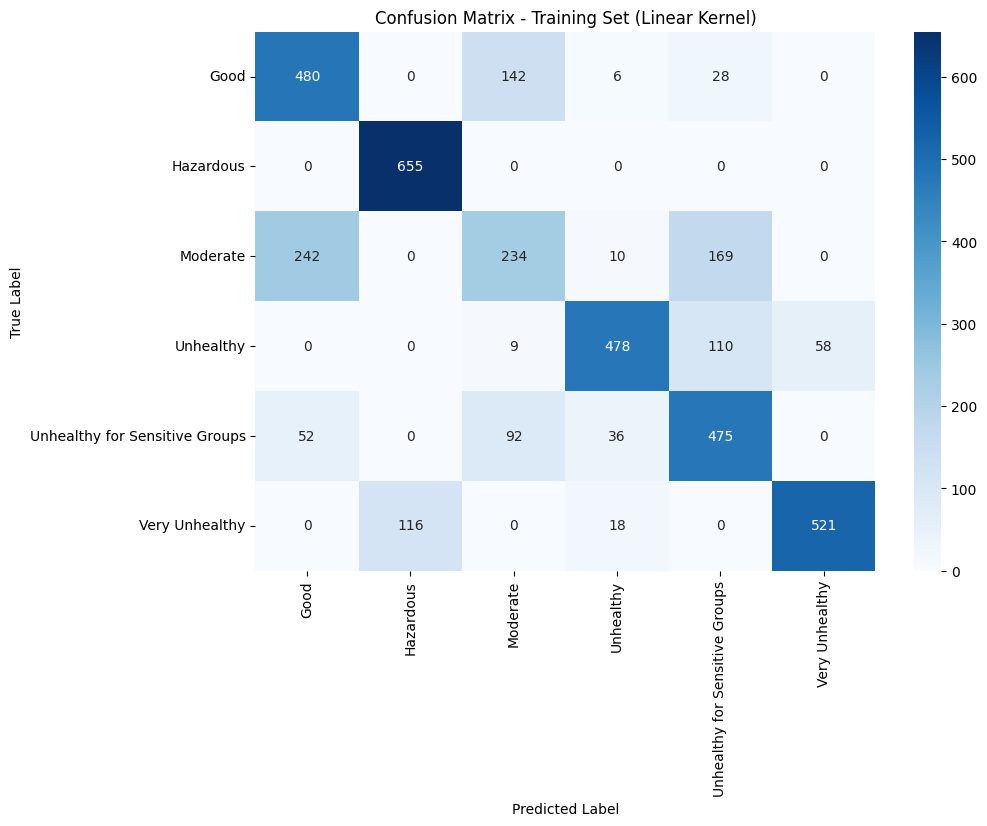

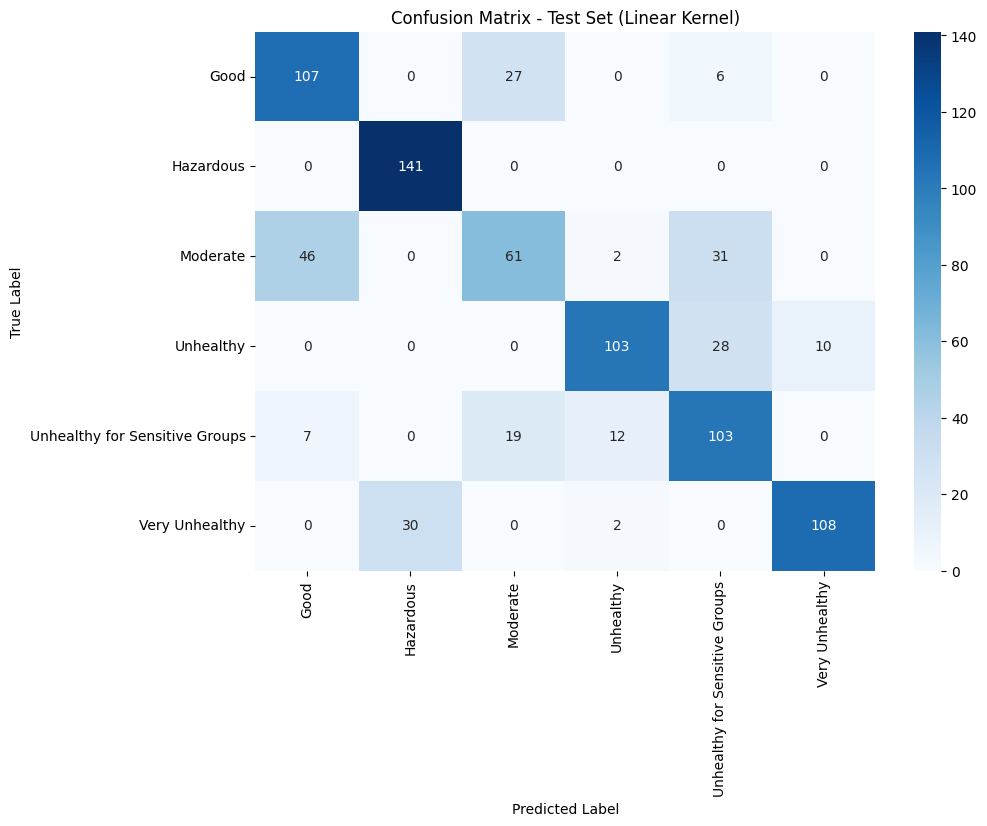

In [ ]:

cm_train = confusion_matrix(y_train, svm_model.predict(X_train))

plt.figure(figsize=(10, 7))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.title('Confusion Matrix - Training Set (Linear Kernel)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

cm_test = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.title('Confusion Matrix - Test Set (Linear Kernel)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

###Loss(Validation vs Train sets)

##Polynomial Kernel

In [ ]:
svm_model_poly = SVC(
    kernel='poly',
    C=1.0,
    degree=3,           # Degree of the polynomial kernel
    gamma='scale',      # Kernel coefficient ( 'scale' or 'auto')
    coef0=0.1,          # Independent term in polynomial kernel
    shrinking=True,
    probability=True,
    tol=1e-3,             # Tolerance
    cache_size=200,
    class_weight=None,
    verbose=False,
    max_iter=4000,
    decision_function_shape='ovr', # One-vs-rest decision function
    break_ties=False,
    random_state=34
)

svm_model_poly.fit(X_train, y_train)

y_val_pred_poly = svm_model_poly.predict(X_val)

print("Validation Set Evaluation (Polynomial Kernel):")
print("Accuracy:", accuracy_score(y_val, y_val_pred_poly))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred_poly))

y_test_pred_poly = svm_model_poly.predict(X_test)

print("\nTest Set Evaluation (Polynomial Kernel):")
print("Accuracy:", accuracy_score(y_test, y_test_pred_poly))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred_poly))

Validation Set Evaluation (Polynomial Kernel):
Accuracy: 0.7482185273159145

Classification Report:
                                 precision    recall  f1-score   support

                          Good       0.67      0.74      0.70       140
                     Hazardous       0.92      0.96      0.94       140
                      Moderate       0.56      0.48      0.51       141
                     Unhealthy       0.80      0.75      0.77       140
Unhealthy for Sensitive Groups       0.65      0.74      0.69       140
                Very Unhealthy       0.89      0.82      0.86       141

                      accuracy                           0.75       842
                     macro avg       0.75      0.75      0.75       842
                  weighted avg       0.75      0.75      0.75       842


Test Set Evaluation (Polynomial Kernel):
Accuracy: 0.7520759193357058

Classification Report:
                                 precision    recall  f1-score   support

       

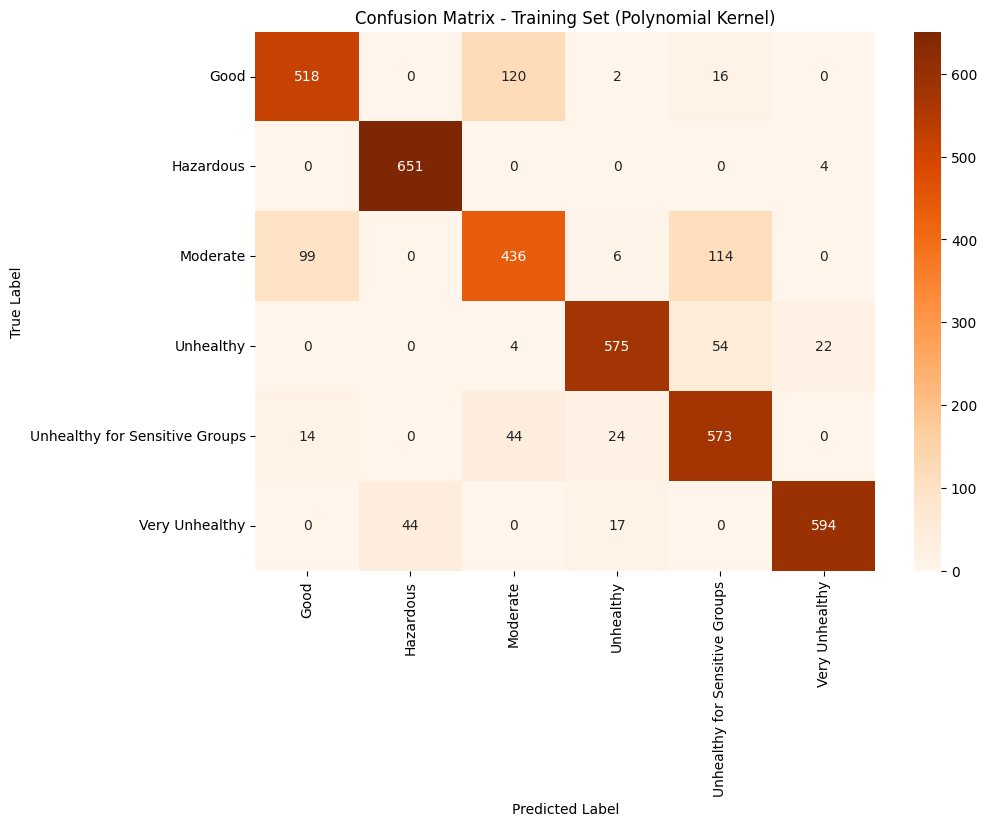

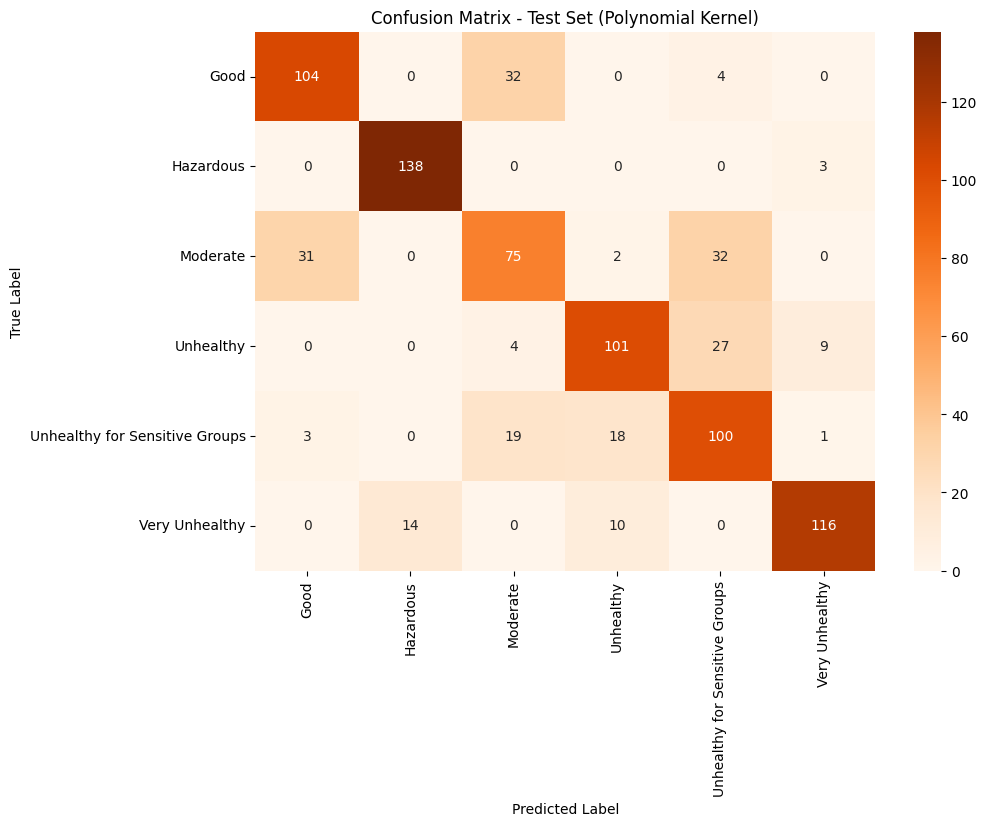

In [ ]:
cm_train_poly = confusion_matrix(y_train, svm_model_poly.predict(X_train))

plt.figure(figsize=(10, 7))
sns.heatmap(cm_train_poly, annot=True, fmt='d', cmap='Oranges', xticklabels=svm_model_poly.classes_, yticklabels=svm_model_poly.classes_)
plt.title('Confusion Matrix - Training Set (Polynomial Kernel)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

cm_test_poly = confusion_matrix(y_test, y_test_pred_poly)

plt.figure(figsize=(10, 7))
sns.heatmap(cm_test_poly, annot=True, fmt='d', cmap='Oranges', xticklabels=svm_model_poly.classes_, yticklabels=svm_model_poly.classes_)
plt.title('Confusion Matrix - Test Set (Polynomial Kernel)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

##RBF Kernel

In [ ]:
svm_model_rbf = SVC(
    kernel='rbf',
    C=1.0,
    degree=3,
    gamma='scale',      # Kernel coefficient ('scale' or 'auto')
    coef0=0.0,
    shrinking=True,
    probability=True,
    tol=1e-3,             # Tolerance
    cache_size=200,
    class_weight=None,
    verbose=False,
    max_iter=4000,
    decision_function_shape='ovr', # One-vs-rest decision function
    break_ties=False,
    random_state=34
)

svm_model_rbf.fit(X_train, y_train)

y_val_pred_rbf = svm_model_rbf.predict(X_val)

print("Validation Set Evaluation (RBF Kernel):")
print("Accuracy:", accuracy_score(y_val, y_val_pred_rbf))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred_rbf))

y_test_pred_rbf = svm_model_rbf.predict(X_test)

print("\nTest Set Evaluation (RBF Kernel):")
print("Accuracy:", accuracy_score(y_test, y_test_pred_rbf))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred_rbf))


Validation Set Evaluation (RBF Kernel):
Accuracy: 0.7862232779097387

Classification Report:
                                 precision    recall  f1-score   support

                          Good       0.67      0.78      0.72       140
                     Hazardous       0.91      0.99      0.95       140
                      Moderate       0.61      0.52      0.56       141
                     Unhealthy       0.92      0.76      0.83       140
Unhealthy for Sensitive Groups       0.71      0.81      0.76       140
                Very Unhealthy       0.92      0.87      0.89       141

                      accuracy                           0.79       842
                     macro avg       0.79      0.79      0.78       842
                  weighted avg       0.79      0.79      0.78       842


Test Set Evaluation (RBF Kernel):
Accuracy: 0.7864768683274022

Classification Report:
                                 precision    recall  f1-score   support

                     

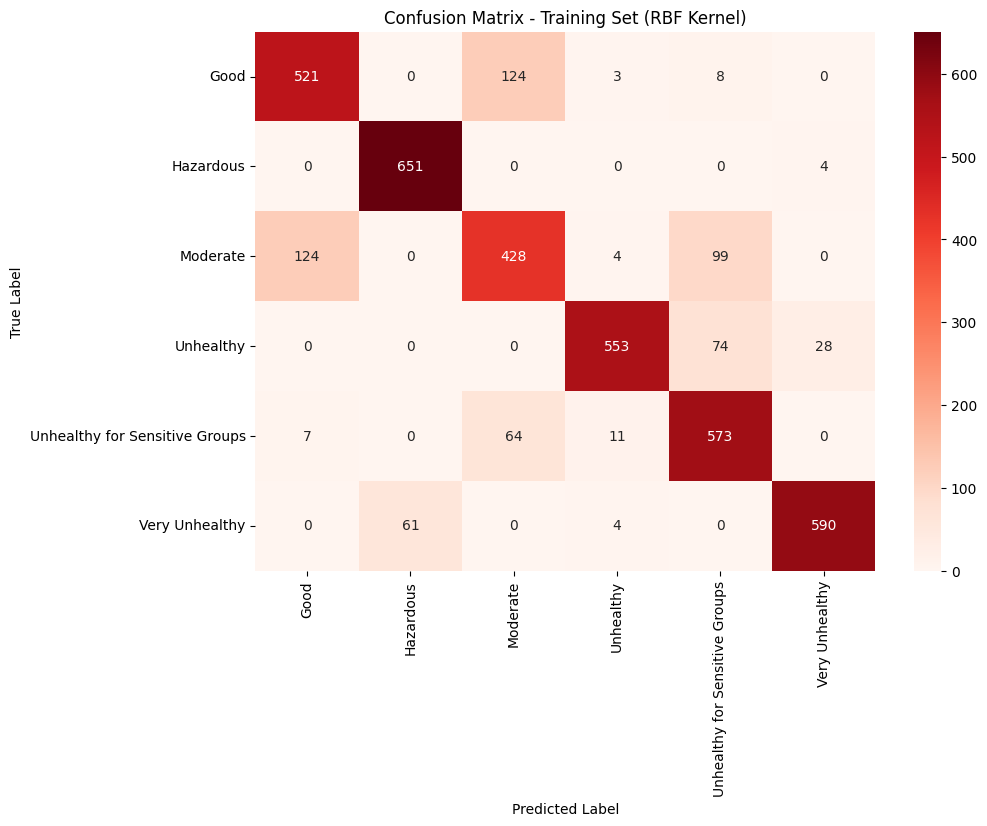

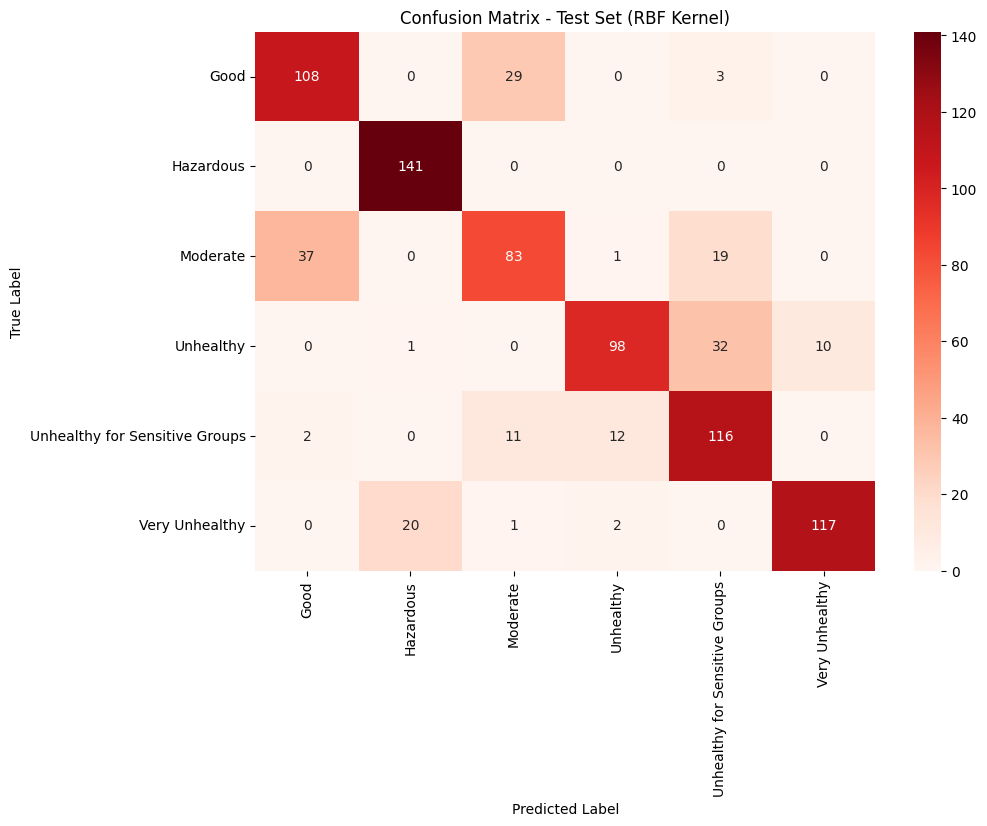

In [ ]:
cm_train_rbf = confusion_matrix(y_train, svm_model_rbf.predict(X_train))

plt.figure(figsize=(10, 7))
sns.heatmap(cm_train_rbf, annot=True, fmt='d', cmap='Reds', xticklabels=svm_model_rbf.classes_, yticklabels=svm_model_rbf.classes_)
plt.title('Confusion Matrix - Training Set (RBF Kernel)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

cm_test_rbf = confusion_matrix(y_test, y_test_pred_rbf)

plt.figure(figsize=(10, 7))
sns.heatmap(cm_test_rbf, annot=True, fmt='d', cmap='Reds', xticklabels=svm_model_rbf.classes_, yticklabels=svm_model_rbf.classes_)
plt.title('Confusion Matrix - Test Set (RBF Kernel)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#From Scratch SVM

##Linear


Test Set Evaluation (Multi-Class Classification with SGD SVM OvR):
Accuracy: 0.37841043890865955

Classification Report:
                                 precision    recall  f1-score   support

                          Good       0.35      0.36      0.36       140
                     Hazardous       0.59      0.67      0.63       141
                      Moderate       0.34      0.57      0.43       140
                     Unhealthy       0.31      0.26      0.28       141
Unhealthy for Sensitive Groups       0.42      0.06      0.10       141
                Very Unhealthy       0.30      0.35      0.32       140

                      accuracy                           0.38       843
                     macro avg       0.38      0.38      0.35       843
                  weighted avg       0.38      0.38      0.35       843



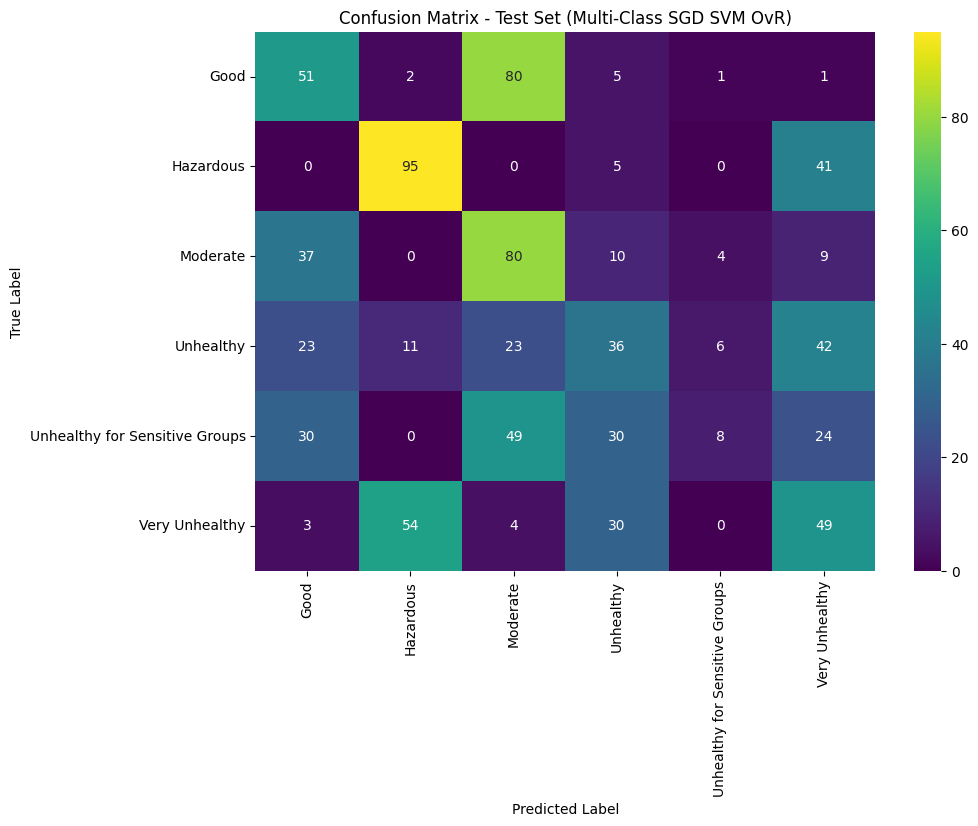

In [ ]:
import numpy as np
import cvxopt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def linear_kernel(x1, x2):
    return np.dot(x1, x2)

class SGDSVM:
    def __init__(self, kernel=linear_kernel, C=1.0, learning_rate=0.01, epochs=1000):
        self.kernel = kernel
        self.C = C
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.w = None
        self.b = 0

    def fit(self, X, y):
        X = np.asarray(X)
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)

        for _ in range(self.epochs):
            for i in range(n_samples):
                y_i = float(y.iloc[i])

                if y_i * (np.dot(X[i], self.w) + self.b) < 1:
                    self.w = self.w - self.learning_rate * (self.w - self.C * y_i * X[i])
                    self.b = self.b + self.learning_rate * self.C * y_i
                else:
                    self.w = self.w - self.learning_rate * self.w


    def predict(self, X):
        X = np.asarray(X)
        return np.sign(np.dot(X, self.w) + self.b)

class MultiClassSGDSVM_OvR:
    def __init__(self, kernel=linear_kernel, C=1.0, learning_rate=0.01, epochs=100):
        self.kernel = kernel
        self.C = C
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.binary_svm_models = {}
        self.classes_ = None

    def fit(self, X, y):
        self.classes_ = np.unique(y)
        for class_label in self.classes_:
            y_binary = y.apply(lambda label: 1 if label == class_label else -1)

            svm_model = SGDSVM(kernel=self.kernel, C=self.C, learning_rate=self.learning_rate, epochs=self.epochs)
            svm_model.fit(X, y_binary)
            self.binary_svm_models[class_label] = svm_model

    def predict(self, X):
        X = np.asarray(X)
        n_samples = X.shape[0]
        decision_scores = np.zeros((n_samples, len(self.classes_)))

        for i, class_label in enumerate(self.classes_):
            svm_model = self.binary_svm_models[class_label]
            decision_scores[:, i] = np.dot(X, svm_model.w) + svm_model.b

        predicted_class_indices = np.argmax(decision_scores, axis=1)
        predicted_classes = [self.classes_[i] for i in predicted_class_indices]
        return np.array(predicted_classes)


X_train_np = X_train
X_test_np = X_test

multi_class_svm = MultiClassSGDSVM_OvR(C=0.01, learning_rate=0.01, epochs=100)
multi_class_svm.fit(X_train_np, y_train)

y_test_pred_multi = multi_class_svm.predict(X_test_np)

print("\nTest Set Evaluation (Multi-Class Classification with SGD SVM OvR):")
print("Accuracy:", accuracy_score(y_test, y_test_pred_multi))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred_multi))

cm_test_multi = confusion_matrix(y_test, y_test_pred_multi)

plt.figure(figsize=(10, 7))
sns.heatmap(cm_test_multi, annot=True, fmt='d', cmap='viridis', xticklabels=multi_class_svm.classes_, yticklabels=multi_class_svm.classes_)
plt.title('Confusion Matrix - Test Set (Multi-Class SGD SVM OvR)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

##Polynomial


Test Set Evaluation (Multi-Class Classification with Scratch Polynomial SVM OvR):
Accuracy: 0.5836298932384342

Classification Report:
                                 precision    recall  f1-score   support

                          Good       0.50      0.99      0.66       140
                     Hazardous       0.67      0.98      0.79       141
                      Moderate       0.60      0.09      0.15       140
                     Unhealthy       0.59      0.53      0.56       141
Unhealthy for Sensitive Groups       0.65      0.44      0.52       141
                Very Unhealthy       0.58      0.47      0.52       140

                      accuracy                           0.58       843
                     macro avg       0.60      0.58      0.53       843
                  weighted avg       0.60      0.58      0.54       843



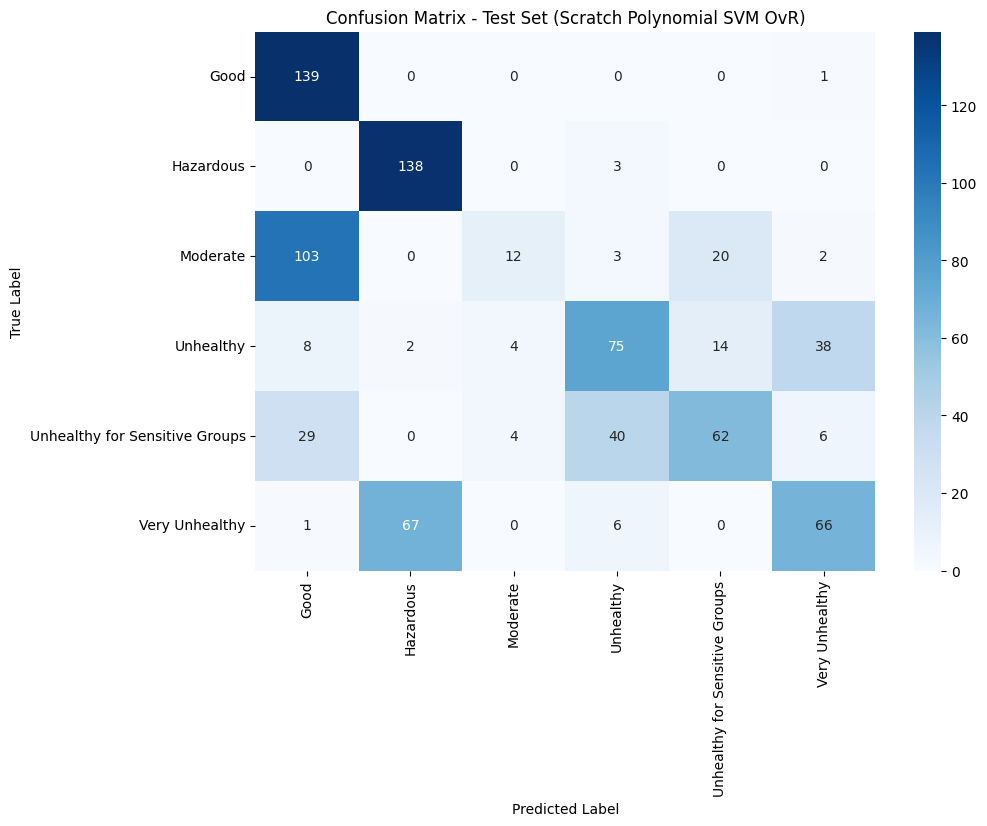

In [ ]:

class PolynomialSVM:
    def __init__(self, degree=3, C=1.0, learning_rate=0.001, epochs=100):
        self.degree = degree
        self.C = C
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.w = None
        self.b = 0

    def polynomial_transform(self, X):

        X_poly = X.copy()
        n_samples, n_features = X.shape

        for d in range(2, self.degree + 1):
            X_poly = np.hstack((X_poly, X**d))
        return X_poly


    def fit(self, X, y):
        X_poly = self.polynomial_transform(X)
        n_samples, n_poly_features = X_poly.shape
        self.w = np.zeros(n_poly_features)

        for _ in range(self.epochs):
            for i in range(n_samples):
                y_i = float(y[i])

                if y_i * (np.dot(X_poly[i], self.w) + self.b) < 1:
                    self.w = self.w - self.learning_rate * (self.w - self.C * y_i * X_poly[i])
                    self.b = self.b + self.learning_rate * self.C * y_i
                else:
                    self.w = self.w - self.learning_rate * self.w


    def predict(self, X):
        X_poly = self.polynomial_transform(X)
        return np.sign(np.dot(X_poly, self.w) + self.b)


class MultiClassPolynomialSVM_OvR:
    def __init__(self, degree=3, C=1.0, learning_rate=0.001, epochs=100):
        self.degree = degree
        self.C = C
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.binary_svm_models = {}
        self.classes_ = None

    def fit(self, X, y):
        self.classes_ = np.unique(y)
        if isinstance(y, np.ndarray):
          y = pd.Series(y)

        for class_label in self.classes_:

            if isinstance(y, pd.Series):
                y_binary = y.apply(lambda label: 1 if label == class_label else -1)
            else:
                y_binary = np.array([1 if label == class_label else -1 for label in y])


            svm_model = PolynomialSVM(degree=self.degree, C=self.C, learning_rate=self.learning_rate, epochs=self.epochs)
            svm_model.fit(X, y_binary)
            self.binary_svm_models[class_label] = svm_model

    def predict(self, X):
        n_samples = X.shape[0]
        decision_scores = np.zeros((n_samples, len(self.classes_)))

        for i, class_label in enumerate(self.classes_):
            svm_model = self.binary_svm_models[class_label]
            X_poly = svm_model.polynomial_transform(X)
            decision_scores[:, i] = np.dot(X_poly, svm_model.w) + svm_model.b


        predicted_class_indices = np.argmax(decision_scores, axis=1)
        predicted_classes = [self.classes_[i] for i in predicted_class_indices]
        return np.array(predicted_classes)

X_train_np = X_train.values
X_test_np = X_test.values
y_train_np = y_train.values
y_test_np = y_test.values


multi_class_poly_svm = MultiClassPolynomialSVM_OvR(degree=3, C=1.0, learning_rate=0.0001, epochs=1000)
multi_class_poly_svm.fit(X_train_np, y_train_np)

y_test_pred_poly_scratch = multi_class_poly_svm.predict(X_test_np)

print("\nTest Set Evaluation (Multi-Class Classification with Scratch Polynomial SVM OvR):")
print("Accuracy:", accuracy_score(y_test_np, y_test_pred_poly_scratch))
print("\nClassification Report:\n", classification_report(y_test_np, y_test_pred_poly_scratch))

cm_test_poly_scratch = confusion_matrix(y_test_np, y_test_pred_poly_scratch)

plt.figure(figsize=(10, 7))
sns.heatmap(cm_test_poly_scratch, annot=True, fmt='d', cmap='Blues', xticklabels=multi_class_poly_svm.classes_, yticklabels=multi_class_poly_svm.classes_)
plt.title('Confusion Matrix - Test Set (Scratch Polynomial SVM OvR)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

##RBF

In [ ]:
import numpy as np

class RandomFourierRBFSVM:
    def __init__(self, gamma=1.0, C=1.0, n_features=500, learning_rate=0.01, epochs=1000):
        self.gamma = gamma
        self.C = C
        self.n_features = n_features
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.w = None
        self.b = 0
        self.W = None
        self.b_rff = None

    def _rff_transform(self, X):
        projection = X @ self.W + self.b_rff
        Z = np.sqrt(2.0 / self.n_features) * np.cos(projection)
        return Z

    def fit(self, X, y):
        X = np.asarray(X)
        y = np.asarray(y)
        n_samples, n_input_features = X.shape

        self.W = np.random.normal(0, np.sqrt(2 * self.gamma), size=(n_input_features, self.n_features))
        self.b_rff = np.random.uniform(0, 2 * np.pi, size=(self.n_features,))

        Z = self._rff_transform(X)

        self.classes_ = np.unique(y)
        self.class_w = {}
        self.class_b = {}

        for class_label in self.classes_:
            y_binary = np.where(y == class_label, 1, -1)
            w = np.zeros(self.n_features)
            b = 0
            for epoch in range(self.epochs):
                for i in range(n_samples):
                    margin = y_binary[i] * (np.dot(Z[i], w) + b)
                    if margin < 1:
                        w = (1 - self.learning_rate) * w + self.learning_rate * self.C * y_binary[i] * Z[i]
                        b += self.learning_rate * self.C * y_binary[i]
                    else:
                        w = (1 - self.learning_rate) * w
            self.class_w[class_label] = w
            self.class_b[class_label] = b

    def predict(self, X):
        X = np.asarray(X)
        Z = self._rff_transform(X)
        n_samples = Z.shape[0]
        scores = np.zeros((n_samples, len(self.classes_)))
        for idx, class_label in enumerate(self.classes_):
            w = self.class_w[class_label]
            b = self.class_b[class_label]
            scores[:, idx] = np.dot(Z, w) + b
        pred_indices = np.argmax(scores, axis=1)
        return self.classes_[pred_indices]



Test Set Evaluation (Random Fourier RBF SVM OvR):
Accuracy: 0.45077105575326215

Classification Report:
                                 precision    recall  f1-score   support

                          Good       0.36      0.74      0.48       140
                     Hazardous       0.55      0.99      0.70       141
                      Moderate       0.35      0.37      0.36       140
                     Unhealthy       0.53      0.45      0.49       141
Unhealthy for Sensitive Groups       0.56      0.06      0.11       141
                Very Unhealthy       0.87      0.09      0.17       140

                      accuracy                           0.45       843
                     macro avg       0.54      0.45      0.39       843
                  weighted avg       0.54      0.45      0.39       843



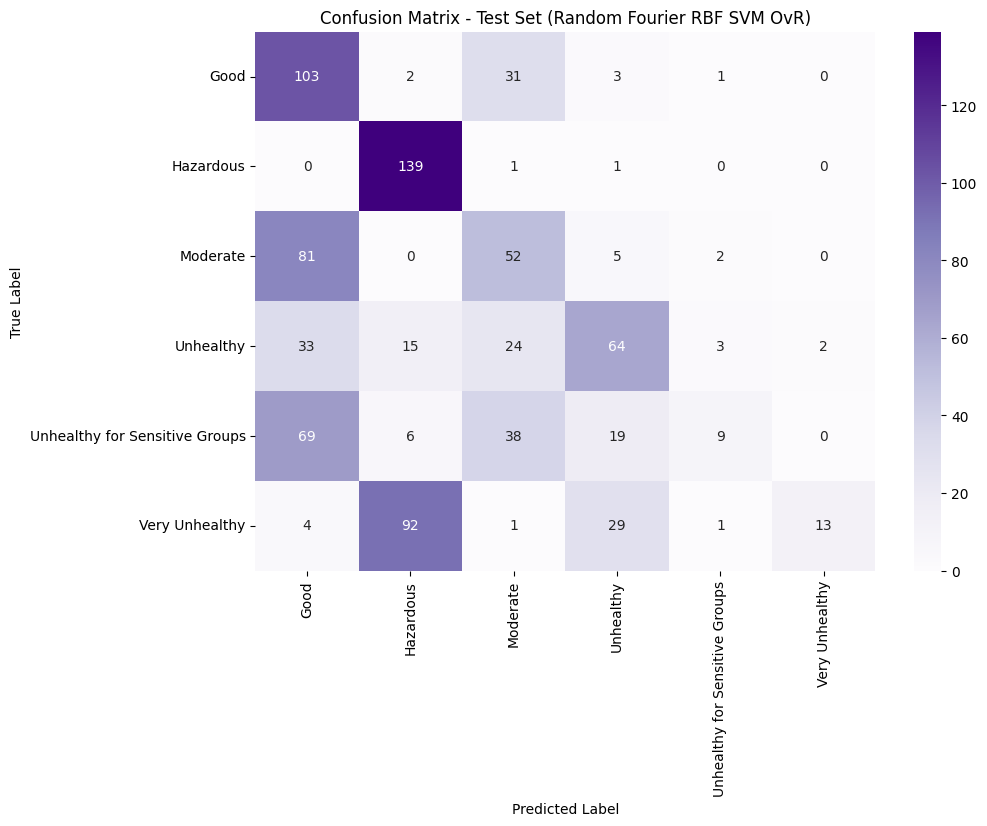

In [ ]:

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rff_svm_model = RandomFourierRBFSVM(
    gamma=0.1,
    C=1.0,
    n_features=1000,
    learning_rate=0.001,
    epochs=500
)


X_train_np = X_train.values
X_test_np = X_test.values
y_train_np = y_train.values
y_test_np = y_test.values

rff_svm_model.fit(X_train_np, y_train_np)

y_test_pred_rff = rff_svm_model.predict(X_test_np)

print("\nTest Set Evaluation (Random Fourier RBF SVM OvR):")
print("Accuracy:", accuracy_score(y_test_np, y_test_pred_rff))
print("\nClassification Report:\n", classification_report(y_test_np, y_test_pred_rff))

cm_test_rff = confusion_matrix(y_test_np, y_test_pred_rff)

plt.figure(figsize=(10, 7))
sns.heatmap(cm_test_rff, annot=True, fmt='d', cmap='Purples', xticklabels=rff_svm_model.classes_, yticklabels=rff_svm_model.classes_)
plt.title('Confusion Matrix - Test Set (Random Fourier RBF SVM OvR)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

##Random vs Grid Search=>after train test split

###Linear_GridSearch

Best parameters for Linear Kernel: {'C': 100}
Best cross-validation score for Linear Kernel: 0.9788860357553912

Validation Set Evaluation (Linear Kernel with Grid Search):
Accuracy: 0.9798099762470309

Classification Report:
                                 precision    recall  f1-score   support

                          Good       0.95      1.00      0.97       140
                     Hazardous       0.99      0.99      0.99       140
                      Moderate       0.99      0.92      0.96       141
                     Unhealthy       0.99      0.99      0.99       140
Unhealthy for Sensitive Groups       0.97      0.99      0.98       140
                Very Unhealthy       0.99      0.99      0.99       141

                      accuracy                           0.98       842
                     macro avg       0.98      0.98      0.98       842
                  weighted avg       0.98      0.98      0.98       842


Test Set Evaluation (Linear Kernel with Grid Sear

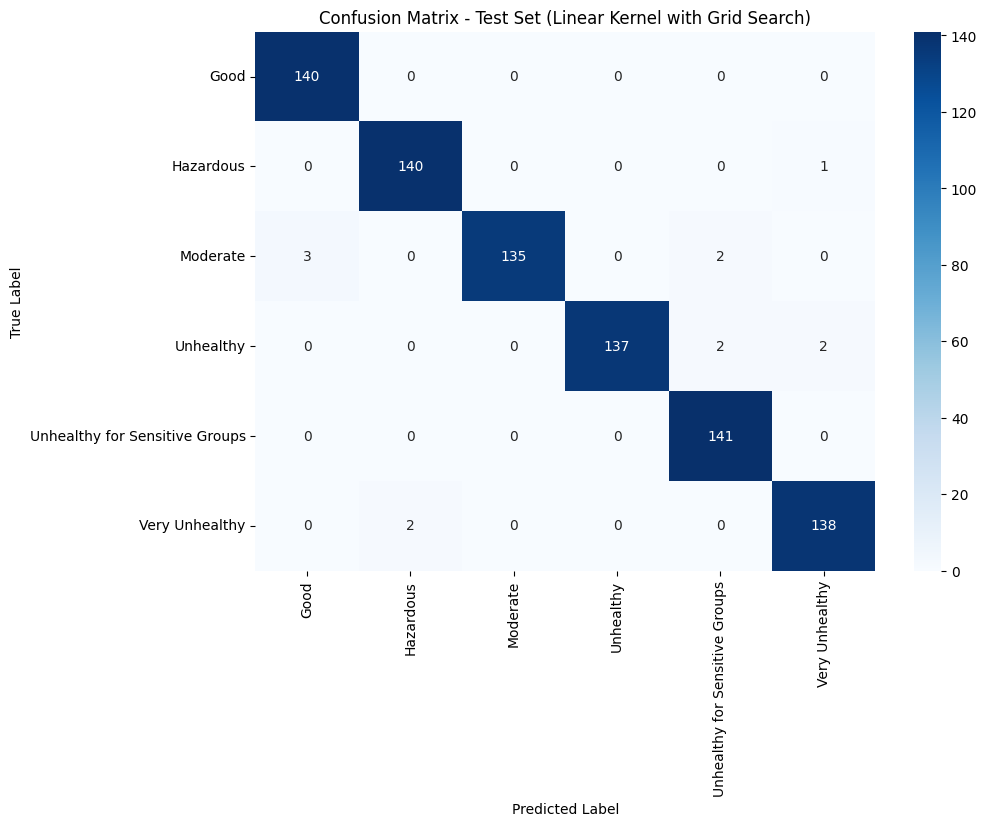

In [ ]:
from sklearn.model_selection import GridSearchCV

X_train = X_train.values
X_val = X_val.values
X_test = X_test.values

param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

svm_linear = SVC(kernel='linear', probability=True, random_state=42)

grid_search_linear = GridSearchCV(svm_linear, param_grid, cv=3, scoring='accuracy')

grid_search_linear.fit(X_train, y_train)

print("Best parameters for Linear Kernel:", grid_search_linear.best_params_)
print("Best cross-validation score for Linear Kernel:", grid_search_linear.best_score_)

best_svm_linear = grid_search_linear.best_estimator_

y_val_pred_linear_grid = best_svm_linear.predict(X_val)

print("\nValidation Set Evaluation (Linear Kernel with Grid Search):")
print("Accuracy:", accuracy_score(y_val, y_val_pred_linear_grid))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred_linear_grid))

y_test_pred_linear_grid = best_svm_linear.predict(X_test)

print("\nTest Set Evaluation (Linear Kernel with Grid Search):")
print("Accuracy:", accuracy_score(y_test, y_test_pred_linear_grid))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred_linear_grid))

cm_test_linear_grid = confusion_matrix(y_test, y_test_pred_linear_grid)

plt.figure(figsize=(10, 7))
sns.heatmap(cm_test_linear_grid, annot=True, fmt='d', cmap='Blues', xticklabels=best_svm_linear.classes_, yticklabels=best_svm_linear.classes_)
plt.title('Confusion Matrix - Test Set (Linear Kernel with Grid Search)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

###Linear_RandomSearch

Best parameters for Linear Kernel (Random Search): {'C': np.float64(95.07143064099162)}
Best cross-validation score for Linear Kernel (Random Search): 0.9786317769198968

Validation Set Evaluation (Linear Kernel with Random Search):
Accuracy: 0.9809976247030879

Classification Report:
                                 precision    recall  f1-score   support

                          Good       0.95      1.00      0.97       140
                     Hazardous       0.99      0.99      0.99       140
                      Moderate       0.99      0.93      0.96       141
                     Unhealthy       0.99      0.99      0.99       140
Unhealthy for Sensitive Groups       0.98      0.99      0.98       140
                Very Unhealthy       0.99      0.99      0.99       141

                      accuracy                           0.98       842
                     macro avg       0.98      0.98      0.98       842
                  weighted avg       0.98      0.98      0.98  

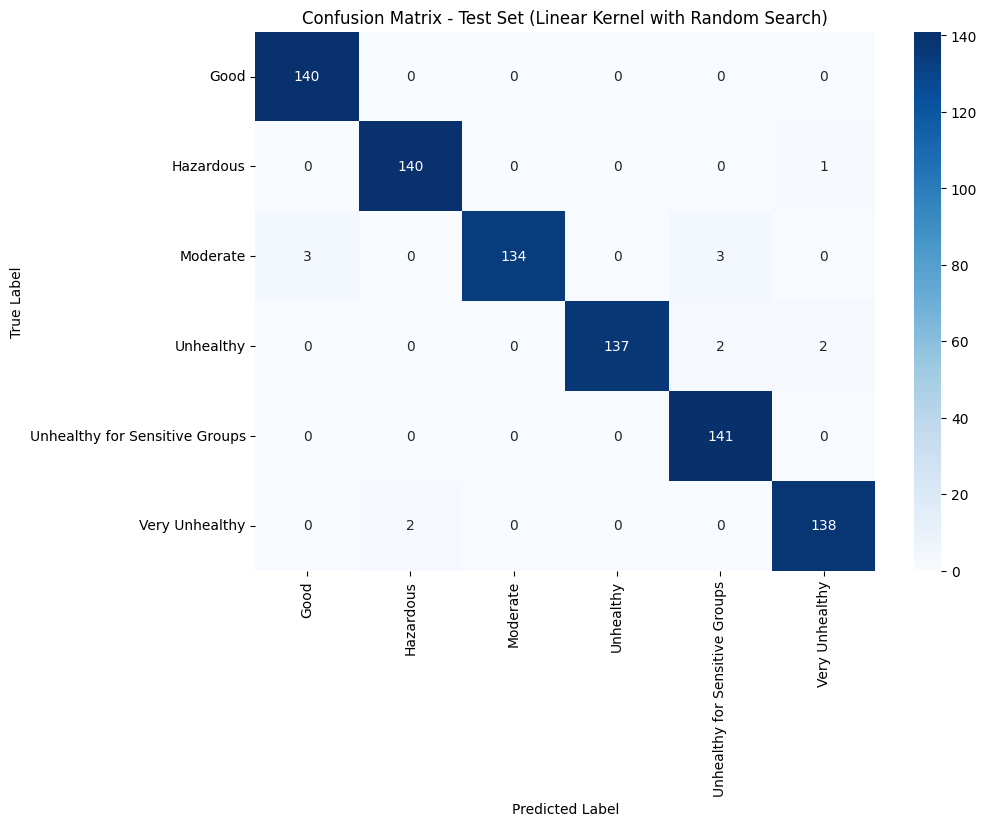

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

param_distributions = {'C': uniform(loc=0, scale=100)}

svm_linear_rs = SVC(kernel='linear', probability=True, random_state=42)

random_search_linear = RandomizedSearchCV(svm_linear_rs, param_distributions, n_iter=10, cv=3, scoring='accuracy', random_state=42)

random_search_linear.fit(X_train, y_train)

print("Best parameters for Linear Kernel (Random Search):", random_search_linear.best_params_)
print("Best cross-validation score for Linear Kernel (Random Search):", random_search_linear.best_score_)

best_svm_linear_rs = random_search_linear.best_estimator_

y_val_pred_linear_rs = best_svm_linear_rs.predict(X_val)

print("\nValidation Set Evaluation (Linear Kernel with Random Search):")
print("Accuracy:", accuracy_score(y_val, y_val_pred_linear_rs))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred_linear_rs))

y_test_pred_linear_rs = best_svm_linear_rs.predict(X_test)

print("\nTest Set Evaluation (Linear Kernel with Random Search):")
print("Accuracy:", accuracy_score(y_test, y_test_pred_linear_rs))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred_linear_rs))

cm_test_linear_rs = confusion_matrix(y_test, y_test_pred_linear_rs)

plt.figure(figsize=(10, 7))
sns.heatmap(cm_test_linear_rs, annot=True, fmt='d', cmap='Blues', xticklabels=best_svm_linear_rs.classes_, yticklabels=best_svm_linear_rs.classes_)
plt.title('Confusion Matrix - Test Set (Linear Kernel with Random Search)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

###RBF_GridSearch

Best parameters for RBF Kernel: {'C': 100, 'gamma': 0.01}
Best cross-validation score for RBF Kernel: 0.887562667039321

Validation Set Evaluation (RBF Kernel with Grid Search):
Accuracy: 0.9180522565320665

Classification Report:
                                 precision    recall  f1-score   support

                          Good       0.88      0.96      0.92       140
                     Hazardous       0.96      0.99      0.97       140
                      Moderate       0.92      0.81      0.86       141
                     Unhealthy       0.95      0.87      0.91       140
Unhealthy for Sensitive Groups       0.87      0.94      0.90       140
                Very Unhealthy       0.94      0.94      0.94       141

                      accuracy                           0.92       842
                     macro avg       0.92      0.92      0.92       842
                  weighted avg       0.92      0.92      0.92       842


Test Set Evaluation (RBF Kernel with Grid Se

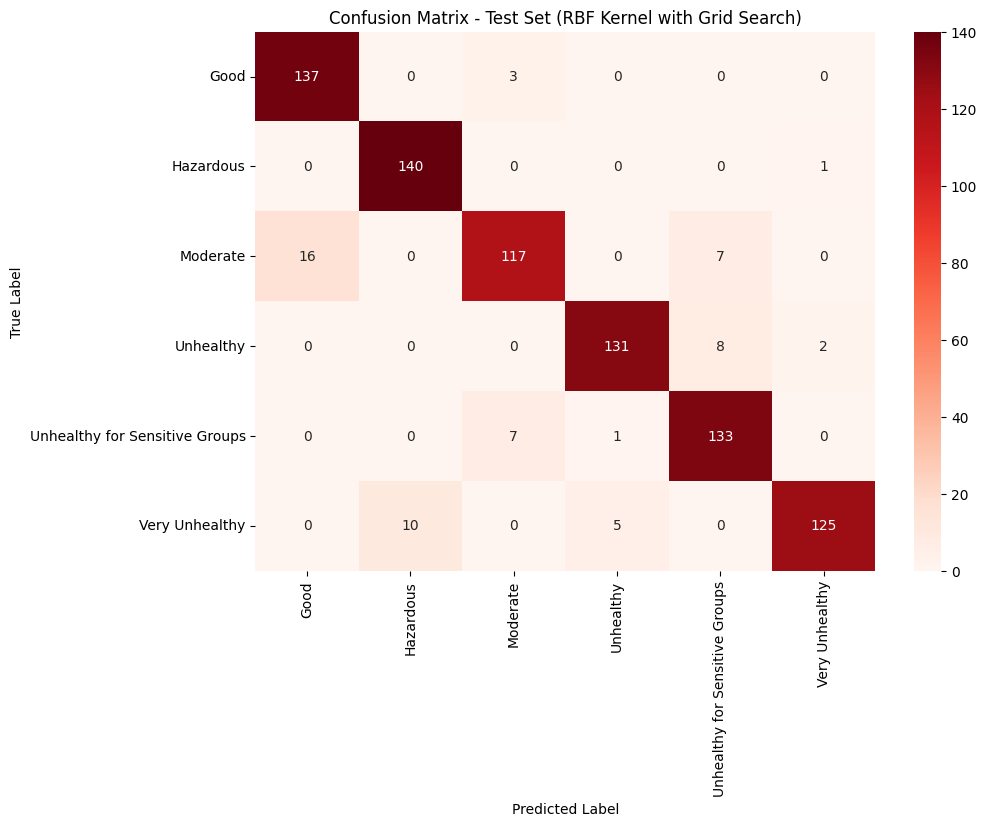

In [ ]:
param_grid_rbf = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 'scale', 'auto']
}

svm_rbf = SVC(kernel='rbf', probability=True, random_state=42)

grid_search_rbf = GridSearchCV(svm_rbf, param_grid_rbf, cv=3, scoring='accuracy', n_jobs=-1)

grid_search_rbf.fit(X_train, y_train)

print("Best parameters for RBF Kernel:", grid_search_rbf.best_params_)
print("Best cross-validation score for RBF Kernel:", grid_search_rbf.best_score_)

best_svm_rbf = grid_search_rbf.best_estimator_

y_val_pred_rbf_grid = best_svm_rbf.predict(X_val)

print("\nValidation Set Evaluation (RBF Kernel with Grid Search):")
print("Accuracy:", accuracy_score(y_val, y_val_pred_rbf_grid))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred_rbf_grid))

y_test_pred_rbf_grid = best_svm_rbf.predict(X_test)

print("\nTest Set Evaluation (RBF Kernel with Grid Search):")
print("Accuracy:", accuracy_score(y_test, y_test_pred_rbf_grid))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred_rbf_grid))

cm_test_rbf_grid = confusion_matrix(y_test, y_test_pred_rbf_grid)

plt.figure(figsize=(10, 7))
sns.heatmap(cm_test_rbf_grid, annot=True, fmt='d', cmap='Reds', xticklabels=best_svm_rbf.classes_, yticklabels=best_svm_rbf.classes_)
plt.title('Confusion Matrix - Test Set (RBF Kernel with Grid Search)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


###RBF_RandomSearch

Best parameters for RBF Kernel (Random Search): {'C': np.float64(15.601864044243651), 'gamma': np.float64(0.15599452033620265)}
Best cross-validation score for RBF Kernel (Random Search): 0.6428383437851183

Validation Set Evaluation (RBF Kernel with Random Search):
Accuracy: 0.7137767220902613

Classification Report:
                                 precision    recall  f1-score   support

                          Good       0.67      0.79      0.72       140
                     Hazardous       0.86      0.86      0.86       140
                      Moderate       0.54      0.51      0.53       141
                     Unhealthy       0.79      0.76      0.77       140
Unhealthy for Sensitive Groups       0.62      0.58      0.60       140
                Very Unhealthy       0.79      0.79      0.79       141

                      accuracy                           0.71       842
                     macro avg       0.71      0.71      0.71       842
                  weighted av

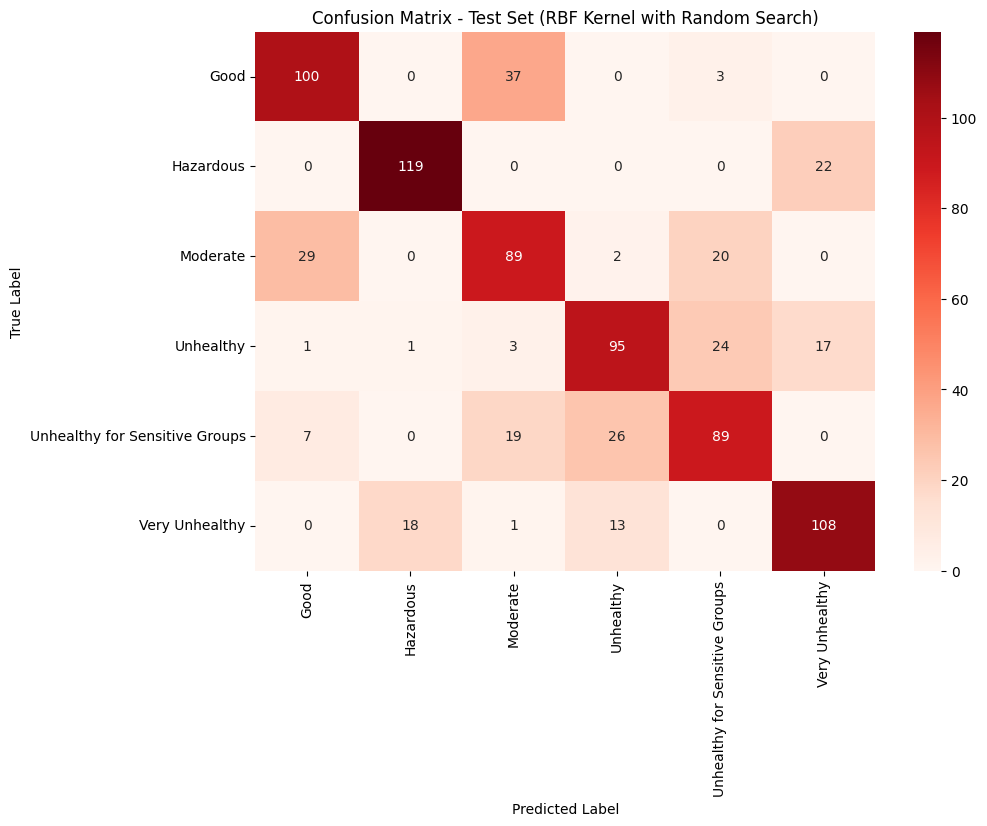

In [ ]:

param_distributions_rbf_rs = {
    'C': uniform(loc=0, scale=100),
    'gamma': uniform(loc=0, scale=1)
}
svm_rbf_rs = SVC(kernel='rbf', probability=True, random_state=34)
random_search_rbf = RandomizedSearchCV(svm_rbf_rs, param_distributions_rbf_rs, n_iter=10, cv=3, scoring='accuracy', random_state=42, n_jobs=-1)
random_search_rbf.fit(X_train, y_train)
print("Best parameters for RBF Kernel (Random Search):", random_search_rbf.best_params_)
print("Best cross-validation score for RBF Kernel (Random Search):", random_search_rbf.best_score_)
best_svm_rbf_rs = random_search_rbf.best_estimator_
y_val_pred_rbf_rs = best_svm_rbf_rs.predict(X_val)
print("\nValidation Set Evaluation (RBF Kernel with Random Search):")
print("Accuracy:", accuracy_score(y_val, y_val_pred_rbf_rs))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred_rbf_rs))
y_test_pred_rbf_rs = best_svm_rbf_rs.predict(X_test)
print("\nTest Set Evaluation (RBF Kernel with Random Search):")
print("Accuracy:", accuracy_score(y_test, y_test_pred_rbf_rs))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred_rbf_rs))
cm_test_rbf_rs = confusion_matrix(y_test, y_test_pred_rbf_rs)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_test_rbf_rs, annot=True, fmt='d', cmap='Reds', xticklabels=best_svm_rbf_rs.classes_, yticklabels=best_svm_rbf_rs.classes_)
plt.title('Confusion Matrix - Test Set (RBF Kernel with Random Search)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#1.2.14

#PSO optimization=>After train test split

In [ ]:
!pip install pyswarm
from pyswarm import pso


  Preparing metadata (setup.py) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4463 sha256=77f27eff32695f5c4d30d1d6b4f761e2ed5dd442ddff3f365f657ca7c34c1d18
  Stored in directory: /root/.cache/pip/wheels/bb/4f/ec/8970b83323e16aa95034da175454843947376614d6d5e9627f
Successfully built pyswarm


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from pyswarm import pso
import numpy as np
import matplotlib.pyplot as plt


def objective_function(params):
    C, gamma = params
    if C <= 0 or gamma <= 0:
        return 1.0


    svm_model_pso = SVC(kernel='rbf', C=C, gamma=gamma, probability=False, random_state=42)

    svm_model_pso.fit(X_train, y_train)


    y_val_pred_pso = svm_model_pso.predict(X_val)

    accuracy = accuracy_score(y_val, y_val_pred_pso)

    return -accuracy

lb = [0.01, 0.001]
ub = [100, 1]


best_params, best_neg_accuracy = pso(objective_function, lb, ub, swarmsize=10, maxiter=20, minstep=1e-8, minfunc=1e-8)

best_C_pso, best_gamma_pso = best_params
best_accuracy_pso = -best_neg_accuracy

print("\nPSO Optimization Results for RBF Kernel:")
print(f"Best C: {best_C_pso:.4f}")
print(f"Best gamma: {best_gamma_pso:.4f}")
print(f"Best accuracy found by PSO (on validation set): {best_accuracy_pso:.4f}")

best_svm_rbf_pso = SVC(kernel='rbf', C=best_C_pso, gamma=best_gamma_pso, probability=True, random_state=34)


best_svm_rbf_pso.fit(X_train, y_train)

y_test_pred_rbf_pso = best_svm_rbf_pso.predict(X_test)

print("\nTest Set Evaluation (RBF Kernel with PSO Optimized Parameters):")
print("Accuracy:", accuracy_score(y_test, y_test_pred_rbf_pso))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred_rbf_pso))

Stopping search: maximum iterations reached --> 20

PSO Optimization Results for RBF Kernel:
Best C: 81.0622
Best gamma: 0.0075
Best accuracy found by PSO (on validation set): 0.9216

Test Set Evaluation (RBF Kernel with PSO Optimized Parameters):
Accuracy: 0.933570581257414

Classification Report:
                                 precision    recall  f1-score   support

                          Good       0.89      0.99      0.94       140
                     Hazardous       0.94      1.00      0.97       141
                      Moderate       0.93      0.81      0.87       140
                     Unhealthy       0.98      0.93      0.96       141
Unhealthy for Sensitive Groups       0.89      0.96      0.92       141
                Very Unhealthy       0.98      0.92      0.95       140

                      accuracy                           0.93       843
                     macro avg       0.94      0.93      0.93       843
                  weighted avg       0.94      0.

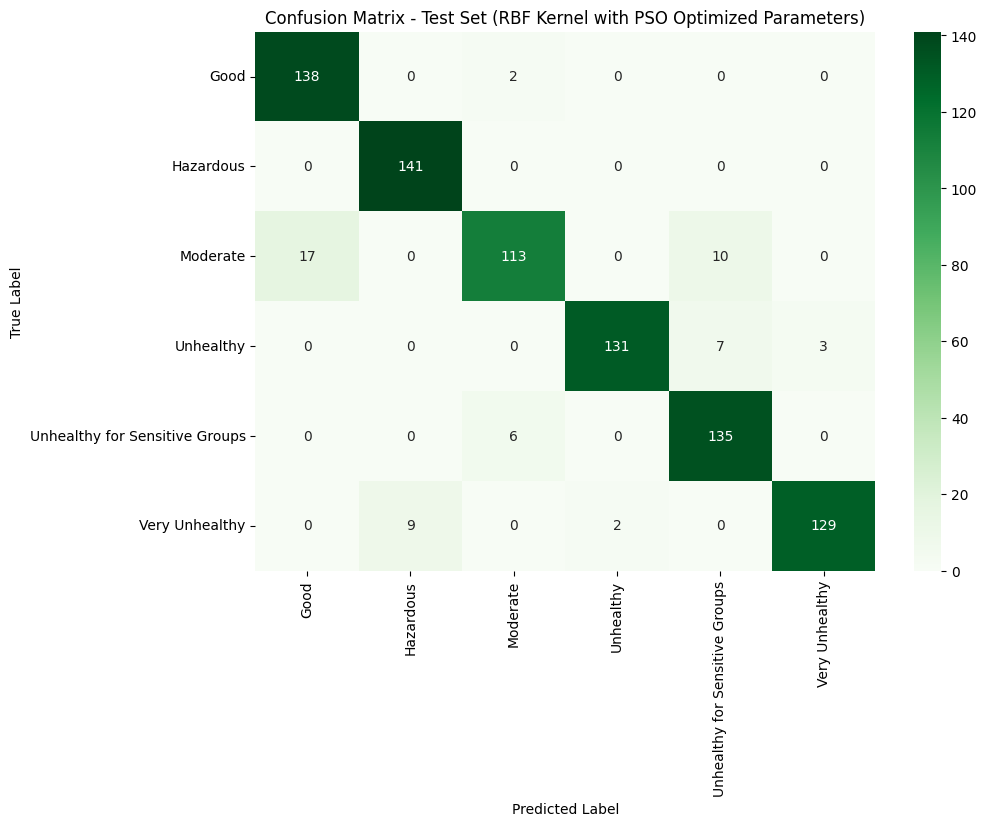

In [ ]:
cm_test_rbf_pso = confusion_matrix(y_test, y_test_pred_rbf_pso)

plt.figure(figsize=(10, 7))
sns.heatmap(cm_test_rbf_pso, annot=True, fmt='d', cmap='Greens', xticklabels=best_svm_rbf_pso.classes_, yticklabels=best_svm_rbf_pso.classes_)
plt.title('Confusion Matrix - Test Set (RBF Kernel with PSO Optimized Parameters)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


#Part 3 The Article Approach

##1.3.5_Differential Evolution(DE)=>RBF kernel

In [ ]:

def objective_function_de(params):
    C, gamma = params
    if C <= 0 or gamma <= 0:
        return 1.0


    svm_model_de = SVC(kernel='rbf', C=C, gamma=gamma, probability=False, random_state=42)

    svm_model_de.fit(X_train, y_train)

    y_val_pred_de = svm_model_de.predict(X_val)

    accuracy = accuracy_score(y_val, y_val_pred_de)

    return -accuracy


bounds = [(0.01, 100), (0.001, 1)]

from scipy.optimize import differential_evolution


result_de = differential_evolution(
    objective_function_de,
    bounds,
    strategy='best1bin',
    maxiter=50,
    popsize=15,
    tol=0.01,
    mutation=(0.5, 1),
    recombination=0.7,
    seed=42,
    disp=True,
    workers=-1
)

best_C_de, best_gamma_de = result_de.x
best_neg_accuracy_de = result_de.fun
best_accuracy_de = -best_neg_accuracy_de

print("\nDifferential Evolution Optimization Results for RBF Kernel:")
print(f"Best C: {best_C_de:.4f}")
print(f"Best gamma: {best_gamma_de:.4f}")
print(f"Best accuracy found by DE (on validation set): {best_accuracy_de:.4f}")



/usr/local/lib/python3.11/dist-packages/scipy/optimize/_differentialevolution.py:486: UserWarning: differential_evolution: the 'workers' keyword has overridden updating='immediate' to updating='deferred'
  with DifferentialEvolutionSolver(func, bounds, args=args,


differential_evolution step 1: f(x)= -0.8954869358669834
differential_evolution step 2: f(x)= -0.8954869358669834
differential_evolution step 3: f(x)= -0.8990498812351544
differential_evolution step 4: f(x)= -0.8990498812351544
differential_evolution step 5: f(x)= -0.9026128266033254
differential_evolution step 6: f(x)= -0.9133016627078385
differential_evolution step 7: f(x)= -0.9180522565320665
differential_evolution step 8: f(x)= -0.9192399049881235
differential_evolution step 9: f(x)= -0.9204275534441805
differential_evolution step 10: f(x)= -0.9216152019002375
Polishing solution with 'L-BFGS-B'

Differential Evolution Optimization Results for RBF Kernel:
Best C: 85.0595
Best gamma: 0.0064
Best accuracy found by DE (on validation set): 0.9216



Test Set Evaluation (RBF Kernel with DE Optimized Parameters):
Accuracy: 0.9347568208778173

Classification Report:
                                 precision    recall  f1-score   support

                          Good       0.89      0.99      0.94       140
                     Hazardous       0.94      1.00      0.97       141
                      Moderate       0.93      0.81      0.87       140
                     Unhealthy       0.99      0.93      0.96       141
Unhealthy for Sensitive Groups       0.89      0.96      0.92       141
                Very Unhealthy       0.98      0.93      0.95       140

                      accuracy                           0.93       843
                     macro avg       0.94      0.93      0.93       843
                  weighted avg       0.94      0.93      0.93       843



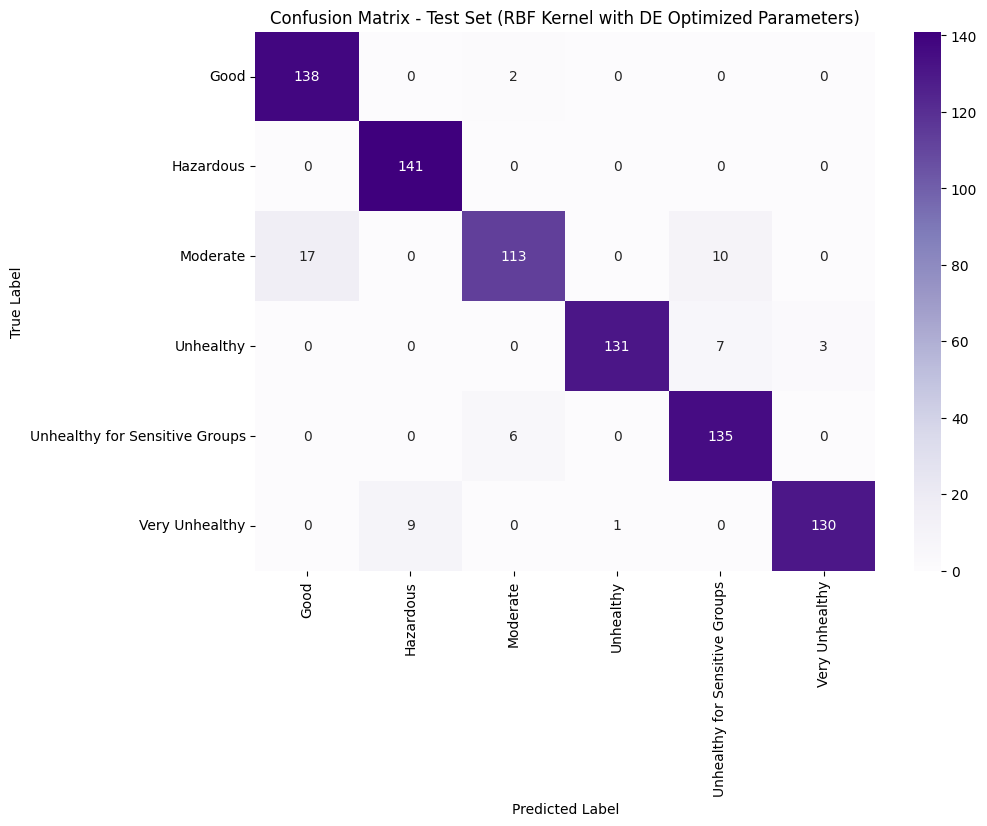

In [ ]:
best_svm_rbf_de = SVC(kernel='rbf', C=best_C_de, gamma=best_gamma_de, probability=True, random_state=42)

best_svm_rbf_de.fit(X_train, y_train)

y_test_pred_rbf_de = best_svm_rbf_de.predict(X_test)

print("\nTest Set Evaluation (RBF Kernel with DE Optimized Parameters):")
print("Accuracy:", accuracy_score(y_test, y_test_pred_rbf_de))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred_rbf_de))

cm_test_rbf_de = confusion_matrix(y_test, y_test_pred_rbf_de)

plt.figure(figsize=(10, 7))
sns.heatmap(cm_test_rbf_de, annot=True, fmt='d', cmap='Purples', xticklabels=best_svm_rbf_de.classes_, yticklabels=best_svm_rbf_de.classes_)
plt.title('Confusion Matrix - Test Set (RBF Kernel with DE Optimized Parameters)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#1.3.6

##Final Product=>NO valid results

In [ ]:


from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['AQI_Category_Encoded'] = label_encoder.fit_transform(df['AQI Category'])

# Select numerical features and the encoded AQI category for correlation
numerical_features = ['year', 'month', 'day', 'hour', 'DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir', 'pm2.5']
features_for_correlation = numerical_features + ['AQI_Category_Encoded']

# Calculate the correlation matrix
correlation_matrix = df[features_for_correlation].corr()

# Get the correlation of 'AQI_Category_Encoded' with other features
aqi_correlation = correlation_matrix['AQI_Category_Encoded'].sort_values(ascending=False)

print("Correlation of AQI Category with Features:")
print(aqi_correlation)

# Drop the temporary encoded column if you don't need it anymore
df = df.drop(columns=['AQI_Category_Encoded'])

Correlation of AQI Category with Features:
AQI_Category_Encoded    1.000000
pm2.5                   0.571792
DEWP                    0.269095
TEMP                    0.085173
day                     0.031771
Is                      0.022692
hour                   -0.002215
Ir                     -0.025515
month                  -0.036269
year                   -0.045770
Iws                    -0.056271
PRES                   -0.176149
Name: AQI_Category_Encoded, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler

features = ['DEWP', 'TEMP', 'AQI Category']
df_selected = df[features]
target = 'AQI Category'
X = df_selected.drop(columns=[target])
y = df_selected[target]
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)
df_balanced = pd.concat([X_resampled, y_resampled], axis=1)
numerical_cols = ['DEWP', 'TEMP']
scaler = StandardScaler()
df_balanced[numerical_cols] = scaler.fit_transform(df_balanced[numerical_cols])
X_balanced_scaled = df_balanced.drop(columns=[target])
y_balanced = df_balanced[target]

# Split into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_balanced_scaled, y_balanced, test_size=0.3, random_state=42, stratify=y_balanced)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(f"Training set size: {len(X_train)} samples")
print(f"Validation set size: {len(X_val)} samples")
print(f"Test set size: {len(X_test)} samples")

Training set size: 3931 samples
Validation set size: 842 samples
Test set size: 843 samples


Test Set Evaluation (Final Linear SVM):
Accuracy: 0.3190984578884935

Classification Report:
                                 precision    recall  f1-score   support

                          Good       0.32      0.56      0.41       140
                     Hazardous       0.43      0.61      0.51       141
                      Moderate       0.34      0.09      0.14       140
                     Unhealthy       0.21      0.07      0.11       141
Unhealthy for Sensitive Groups       0.22      0.13      0.17       141
                Very Unhealthy       0.28      0.45      0.34       140

                      accuracy                           0.32       843
                     macro avg       0.30      0.32      0.28       843
                  weighted avg       0.30      0.32      0.28       843



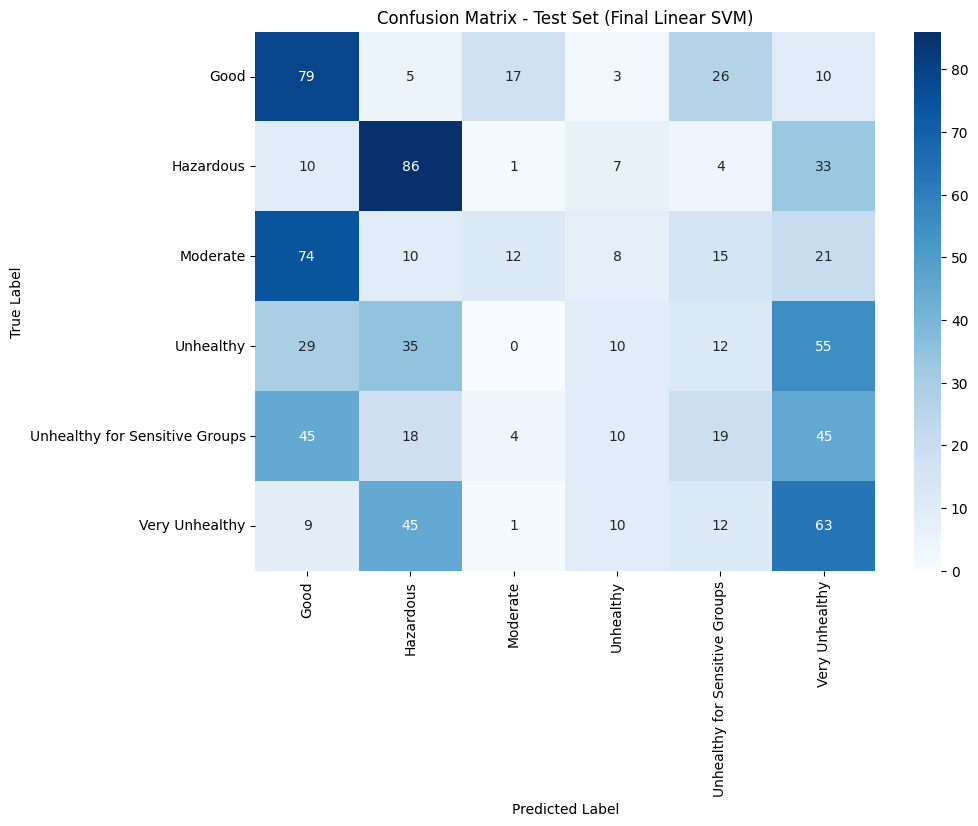

In [ ]:
# prompt: SVM linear

from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

svm_linear_final = SVC(kernel='linear', probability=True, random_state=42)

svm_linear_final.fit(X_train, y_train)

y_test_pred_linear_final = svm_linear_final.predict(X_test)

print("Test Set Evaluation (Final Linear SVM):")
print("Accuracy:", accuracy_score(y_test, y_test_pred_linear_final))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred_linear_final))

cm_test_linear_final = confusion_matrix(y_test, y_test_pred_linear_final)

plt.figure(figsize=(10, 7))
sns.heatmap(cm_test_linear_final, annot=True, fmt='d', cmap='Blues', xticklabels=svm_linear_final.classes_, yticklabels=svm_linear_final.classes_)
plt.title('Confusion Matrix - Test Set (Final Linear SVM)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Validation Set Evaluation (RBF Kernel):
Accuracy: 0.32660332541567694

Classification Report:
                                 precision    recall  f1-score   support

                          Good       0.35      0.67      0.46       140
                     Hazardous       0.36      0.73      0.48       140
                      Moderate       0.37      0.08      0.13       141
                     Unhealthy       0.23      0.12      0.16       140
Unhealthy for Sensitive Groups       0.18      0.07      0.10       140
                Very Unhealthy       0.31      0.29      0.30       141

                      accuracy                           0.33       842
                     macro avg       0.30      0.33      0.27       842
                  weighted avg       0.30      0.33      0.27       842


Test Set Evaluation (RBF Kernel):
Accuracy: 0.3368920521945433

Classification Report:
                                 precision    recall  f1-score   support

                    

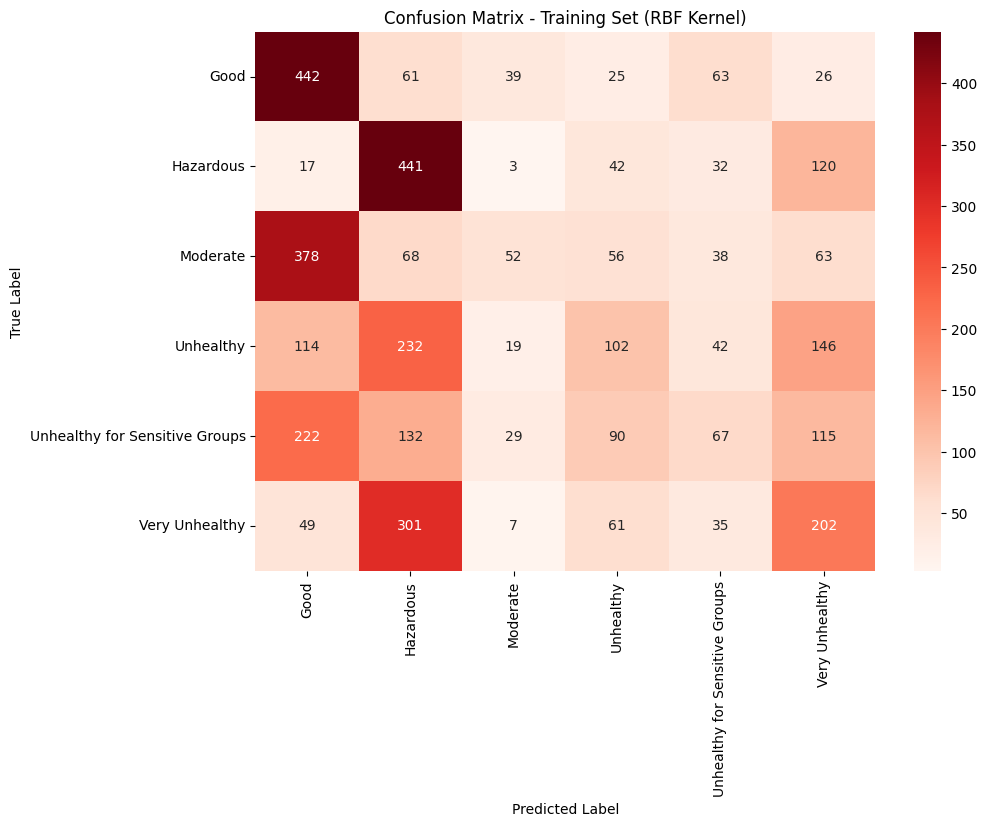

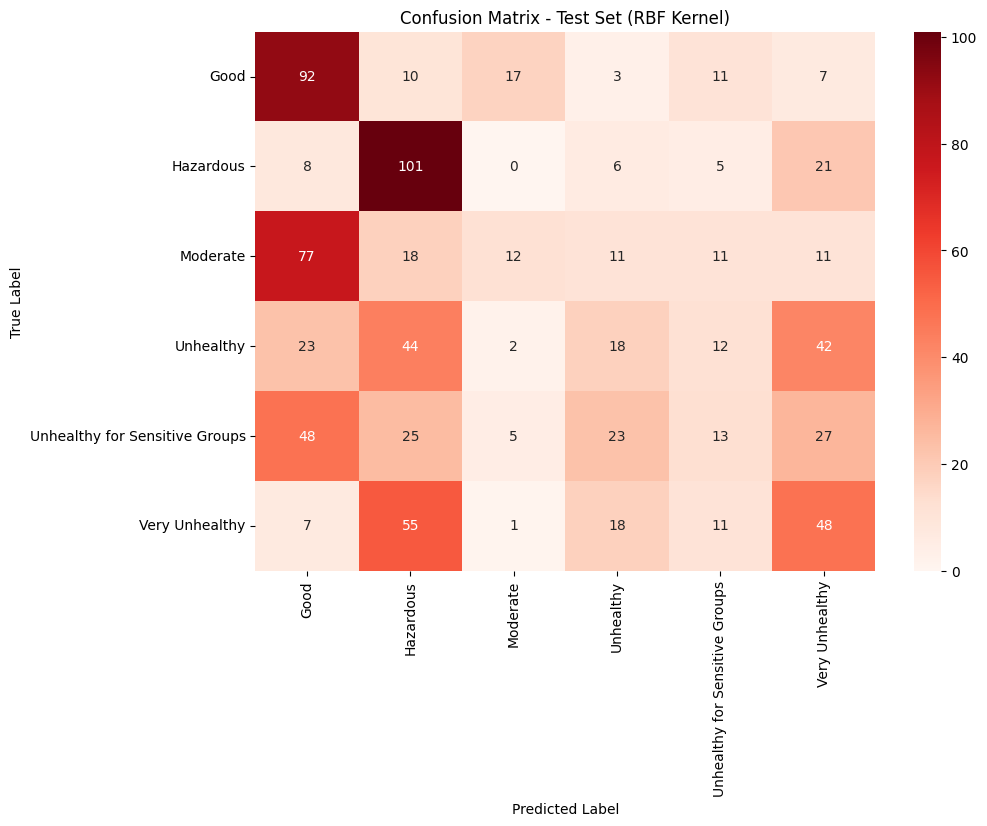

In [ ]:
# prompt: SVM RBF

svm_model_rbf = SVC(
    kernel='rbf',
    C=1.0,
    degree=3,
    gamma='scale',      # Kernel coefficient ('scale' or 'auto')
    coef0=0.0,
    shrinking=True,
    probability=True,
    tol=1e-3,             # Tolerance
    cache_size=200,
    class_weight=None,
    verbose=False,
    max_iter=4000,
    decision_function_shape='ovr', # One-vs-rest decision function
    break_ties=False,
    random_state=34
)

svm_model_rbf.fit(X_train, y_train)

y_val_pred_rbf = svm_model_rbf.predict(X_val)

print("Validation Set Evaluation (RBF Kernel):")
print("Accuracy:", accuracy_score(y_val, y_val_pred_rbf))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred_rbf))

y_test_pred_rbf = svm_model_rbf.predict(X_test)

print("\nTest Set Evaluation (RBF Kernel):")
print("Accuracy:", accuracy_score(y_test, y_test_pred_rbf))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred_rbf))

cm_train_rbf = confusion_matrix(y_train, svm_model_rbf.predict(X_train))

plt.figure(figsize=(10, 7))
sns.heatmap(cm_train_rbf, annot=True, fmt='d', cmap='Reds', xticklabels=svm_model_rbf.classes_, yticklabels=svm_model_rbf.classes_)
plt.title('Confusion Matrix - Training Set (RBF Kernel)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

cm_test_rbf = confusion_matrix(y_test, y_test_pred_rbf)

plt.figure(figsize=(10, 7))
sns.heatmap(cm_test_rbf, annot=True, fmt='d', cmap='Reds', xticklabels=svm_model_rbf.classes_, yticklabels=svm_model_rbf.classes_)
plt.title('Confusion Matrix - Test Set (RBF Kernel)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Best parameters for RBF Kernel: {'C': 10, 'gamma': 1}
Best cross-validation score for RBF Kernel: 0.3243424691832469

Validation Set Evaluation (RBF Kernel with Grid Search):
Accuracy: 0.32660332541567694

Classification Report:
                                 precision    recall  f1-score   support

                          Good       0.37      0.64      0.47       140
                     Hazardous       0.37      0.64      0.47       140
                      Moderate       0.37      0.13      0.19       141
                     Unhealthy       0.30      0.10      0.15       140
Unhealthy for Sensitive Groups       0.19      0.14      0.16       140
                Very Unhealthy       0.27      0.32      0.29       141

                      accuracy                           0.33       842
                     macro avg       0.31      0.33      0.29       842
                  weighted avg       0.31      0.33      0.29       842


Test Set Evaluation (RBF Kernel with Grid Sear

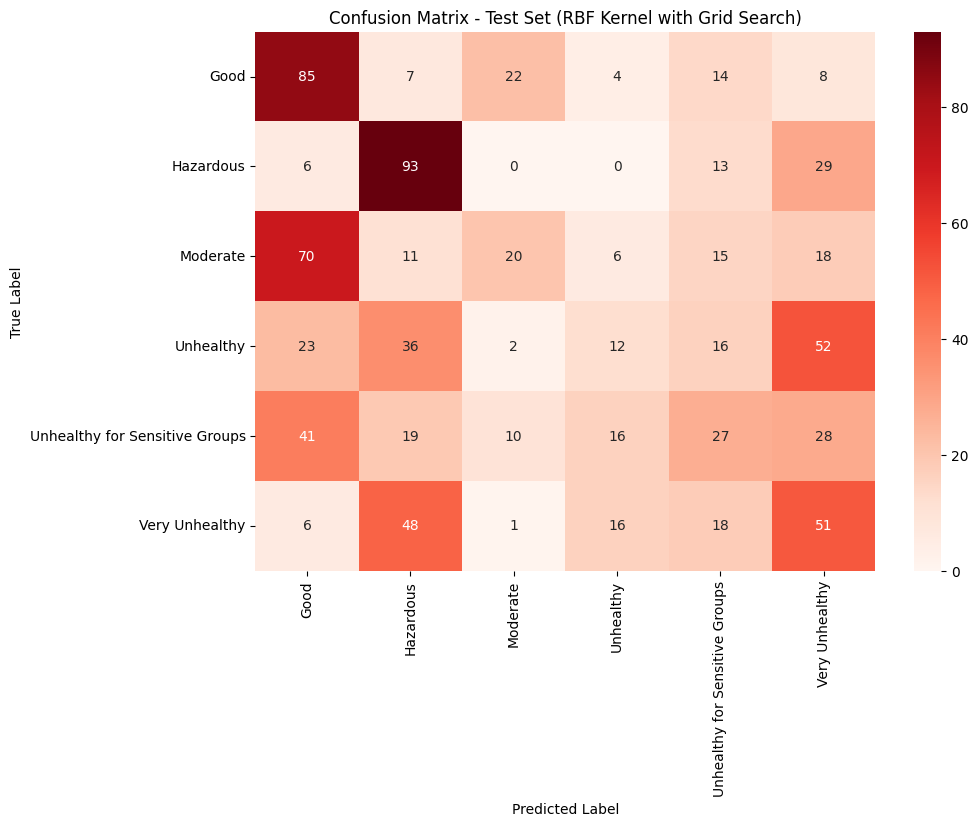

In [ ]:

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


param_grid_rbf = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 'scale', 'auto']
}

svm_rbf = SVC(kernel='rbf', probability=True, random_state=42)

grid_search_rbf = GridSearchCV(svm_rbf, param_grid_rbf, cv=3, scoring='accuracy', n_jobs=-1)

grid_search_rbf.fit(X_train, y_train)

print("Best parameters for RBF Kernel:", grid_search_rbf.best_params_)
print("Best cross-validation score for RBF Kernel:", grid_search_rbf.best_score_)

best_svm_rbf = grid_search_rbf.best_estimator_

y_val_pred_rbf_grid = best_svm_rbf.predict(X_val)

print("\nValidation Set Evaluation (RBF Kernel with Grid Search):")
print("Accuracy:", accuracy_score(y_val, y_val_pred_rbf_grid))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred_rbf_grid))

y_test_pred_rbf_grid = best_svm_rbf.predict(X_test)

print("\nTest Set Evaluation (RBF Kernel with Grid Search):")
print("Accuracy:", accuracy_score(y_test, y_test_pred_rbf_grid))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred_rbf_grid))

cm_test_rbf_grid = confusion_matrix(y_test, y_test_pred_rbf_grid)

plt.figure(figsize=(10, 7))
sns.heatmap(cm_test_rbf_grid, annot=True, fmt='d', cmap='Reds', xticklabels=best_svm_rbf.classes_, yticklabels=best_svm_rbf.classes_)
plt.title('Confusion Matrix - Test Set (RBF Kernel with Grid Search)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()